# Assignment - Advanced Regression

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

## Problem Statement:

The company wants to know:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.

 

Also, determine the optimal value of lambda for ridge and lasso regression.

 

## Business Goal:

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.


## Steps:

    1. Import libraries, Data
    2. Perform EDA - Data cleanup, Preparation, Dummy variables etc
    3. Reduce the features using RFE
    4. Ridge Regression model
    5. Lasso Regression model


## Step 1:Import libraries, Data

In [1]:
# Import libraries 
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

import os

#to ignore Warnings
import warnings
warnings.filterwarnings('ignore')


## Data Understanding and Exploration

In [2]:
#Reading the data
Data_train = pd.read_csv("train.csv")

In [3]:
Data_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [4]:
Data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### Insight:
There are 1460 rows and 81 columns
Unnessary column Id
y -> Sales price

sales related columns:
76  MoSold         1460 non-null   int64  
77  YrSold         1460 non-null   int64 
78  SaleType       1460 non-null   object
79  SaleCondition  1460 non-null   object

High Missing Data colunms:

Alley,
FirePlaceQu,
PoolQC,
Fence,
MiscFearture.


### Data description:
MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density
	
LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

Street: Type of road access to property

       Grvl	Gravel	
       Pave	Paved
       	
Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access
		
LotShape: General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular
       
LandContour: Flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression
		
Utilities: Type of utilities available
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only	
	
LotConfig: Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property
	
LandSlope: Slope of property
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
	
Neighborhood: Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker
			
Condition1: Proximity to various conditions
	
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
Condition2: Proximity to various conditions (if more than one is present)
		
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
BldgType: Type of dwelling
		
       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit
	
HouseStyle: Style of dwelling
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level
	
OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
	
OverallCond: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor
		
YearBuilt: Original construction date

YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

RoofStyle: Type of roof

       Flat	Flat
       Gable	Gable
       Gambrel	Gabrel (Barn)
       Hip	Hip
       Mansard	Mansard
       Shed	Shed
		
RoofMatl: Roof material

       ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	Metal
       Roll	Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingles
		
Exterior1st: Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
Exterior2nd: Exterior covering on house (if more than one material)

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone
	
MasVnrArea: Masonry veneer area in square feet

ExterQual: Evaluates the quality of the material on the exterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
ExterCond: Evaluates the present condition of the material on the exterior
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
Foundation: Type of foundation
		
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood
		
BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement
		
BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement
	
BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement
	
BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
		
BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

Heating: Type of heating
		
       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace	
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace
		
HeatingQC: Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
CentralAir: Central air conditioning

       N	No
       Y	Yes
		
Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed
		
1stFlrSF: First Floor square feet
 
2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Bedrooms above grade (does NOT include basement bedrooms)

Kitchen: Kitchens above grade

KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       	
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Functional: Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only
		
Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace
		
GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage
		
GarageYrBlt: Year garage was built
		
GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage
		
GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
PavedDrive: Paved driveway

       Y	Paved 
       P	Partial Pavement
       N	Dirt/Gravel
		
WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool
		
Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence
	
MiscFeature: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None
		
MiscVal: $Value of miscellaneous feature

MoSold: Month Sold (MM)

YrSold: Year Sold (YYYY)

SaleType: Type of sale
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other
		
SaleCondition: Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)

## Step 2: Perform EDA - Data cleanup, Preparation, Dummy variables etc

In [5]:
Data_train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [6]:
cor = Data_train.corr()
cor

Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.000000    0.011156    -0.010601 -0.033226    -0.028365   
MSSubClass     0.011156    1.000000    -0.386347 -0.139781     0.032628   
LotFrontage   -0.010601   -0.386347     1.000000  0.426095     0.251646   
LotArea       -0.033226   -0.139781     0.426095  1.000000     0.105806   
OverallQual   -0.028365    0.032628     0.251646  0.105806     1.000000   
OverallCond    0.012609   -0.059316    -0.059213 -0.005636    -0.091932   
YearBuilt     -0.012713    0.027850     0.123349  0.014228     0.572323   
YearRemodAdd  -0.021998    0.040581     0.088866  0.013788     0.550684   
MasVnrArea    -0.050298    0.022936     0.193458  0.104160     0.411876   
BsmtFinSF1    -0.005024   -0.069836     0.233633  0.214103     0.239666   
BsmtFinSF2    -0.005968   -0.065649     0.049900  0.111170    -0.059119   
BsmtUnfSF     -0.007940   -0.140759     0.132644 -0.002618     0.308159   
TotalBsmtSF   -0.015415   -0.238518     0.392075  0.260833     0.537808   
1stFlrSF       0.010496   -0.251758     0.457181  0.299475     0.476224   
2ndFlrSF       0.005590    0.307886     0.080177  0.050986     0.295493   
LowQualFinSF  -0.044230    0.046474     0.038469  0.004779    -0.030429   
GrLivArea      0.008273    0.074853     0.402797  0.263116     0.593007   
BsmtFullBath   0.002289    0.003491     0.100949  0.158155     0.111098   
BsmtHalfBath  -0.020155   -0.002333    -0.007234  0.048046    -0.040150   
FullBath       0.005587    0.131608     0.198769  0.126031     0.550600   
HalfBath       0.006784    0.177354     0.053532  0.014259     0.273458   
BedroomAbvGr   0.037719   -0.023438     0.263170  0.119690     0.101676   
KitchenAbvGr   0.002951    0.281721    -0.006069 -0.017784    -0.183882   
TotRmsAbvGrd   0.027239    0.040380     0.352096  0.190015     0.427452   
Fireplaces    -0.019772   -0.045569     0.266639  0.271364     0.396765   
GarageYrBlt    0.000072    0.085072     0.070250 -0.024947     0.547766   
GarageCars     0.016570   -0.040110     0.285691  0.154871     0.600671   
GarageArea     0.017634   -0.098672     0.344997  0.180403     0.562022   
WoodDeckSF    -0.029643   -0.012579     0.088521  0.171698     0.238923   
OpenPorchSF   -0.000477   -0.006100     0.151972  0.084774     0.308819   
EnclosedPorch  0.002889   -0.012037     0.010700 -0.018340    -0.113937   
3SsnPorch     -0.046635   -0.043825     0.070029  0.020423     0.030371   
ScreenPorch    0.001330   -0.026030     0.041383  0.043160     0.064886   
PoolArea       0.057044    0.008283     0.206167  0.077672     0.065166   
MiscVal       -0.006242   -0.007683     0.003368  0.038068    -0.031406   
MoSold         0.021172   -0.013585     0.011200  0.001205     0.070815   
YrSold         0.000712   -0.021407     0.007450 -0.014261    -0.027347   
SalePrice     -0.021917   -0.084284     0.351799  0.263843     0.790982   

               OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
Id                0.012609  -0.012713     -0.021998   -0.050298   -0.005024   
MSSubClass       -0.059316   0.027850      0.040581    0.022936   -0.069836   
LotFrontage      -0.059213   0.123349      0.088866    0.193458    0.233633   
LotArea          -0.005636   0.014228      0.013788    0.104160    0.214103   
OverallQual      -0.091932   0.572323      0.550684    0.411876    0.239666   
OverallCond       1.000000  -0.375983      0.073741   -0.128101   -0.046231   
YearBuilt        -0.375983   1.000000      0.592855    0.315707    0.249503   
YearRemodAdd      0.073741   0.592855      1.000000    0.179618    0.128451   
MasVnrArea       -0.128101   0.315707      0.179618    1.000000    0.264736   
BsmtFinSF1       -0.046231   0.249503      0.128451    0.264736    1.000000   
BsmtFinSF2        0.040229  -0.049107     -0.067759   -0.072319   -0.050117   
BsmtUnfSF        -0.136841   0.149040      0.181133    0.114442   -0.495251   
TotalBsmtSF      -0.171098   0.391452      0.291066    0.363936    0

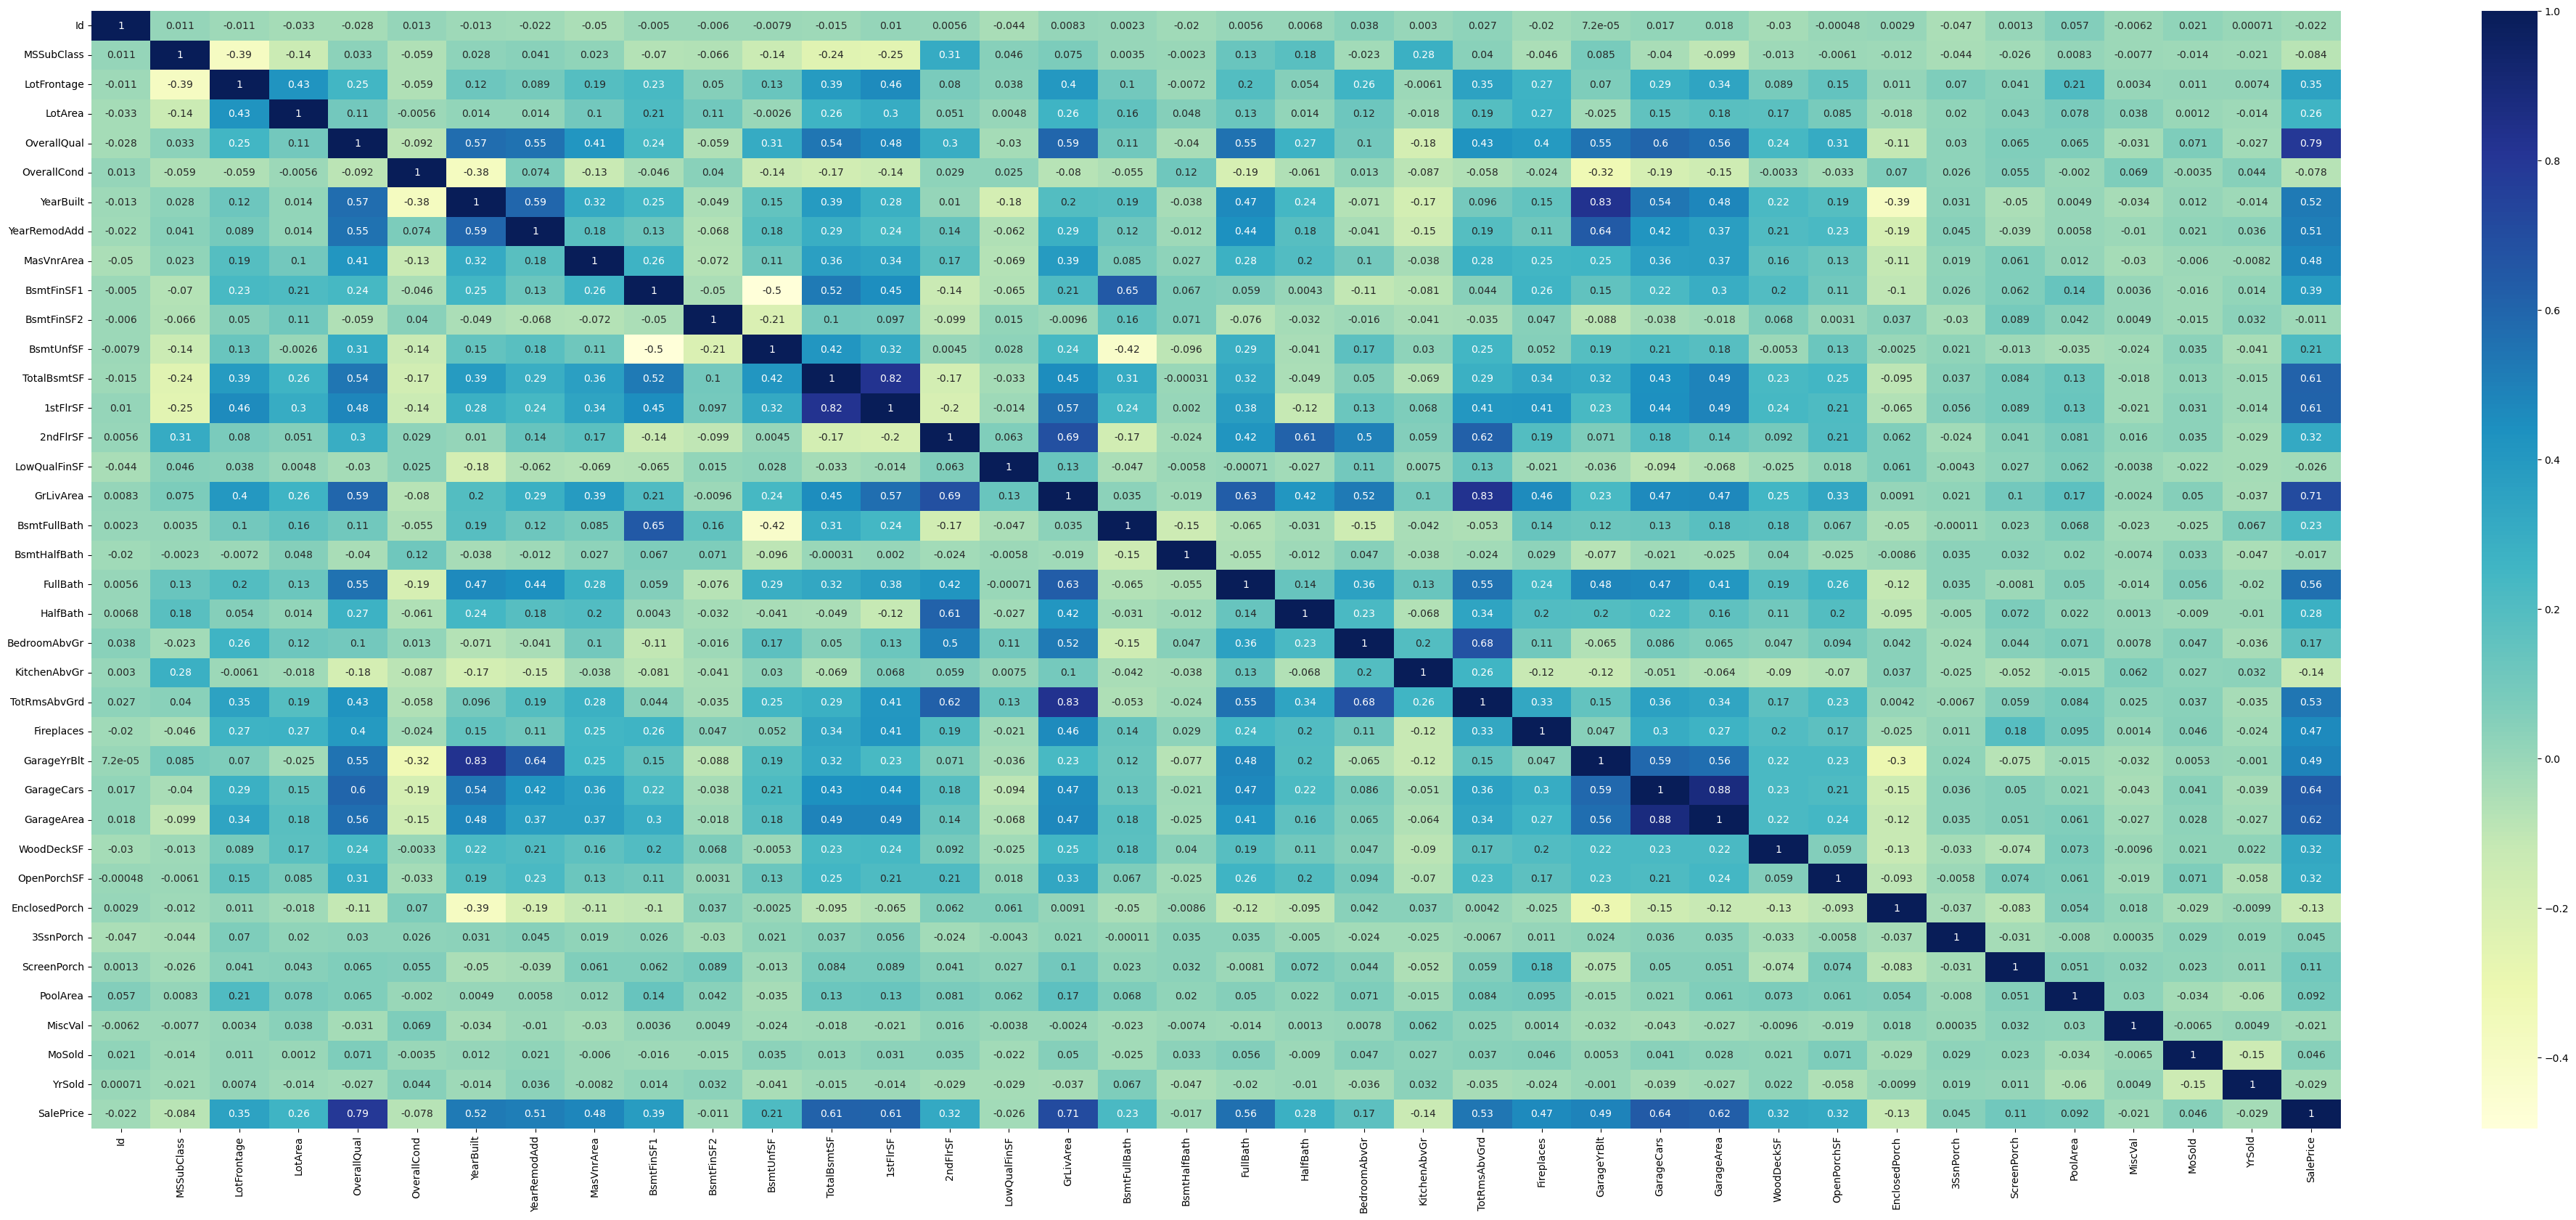

In [7]:

#plotting correlation heatmap
plt.figure(figsize=(50,20))
sns.heatmap(cor, cmap="YlGnBu", annot = True)

plt.show()

#### Insights:
y = SalePrice

## Data Preparation & Analysis

### 1. Using Missingno library identify the missing values more than 80%

<Axes: >

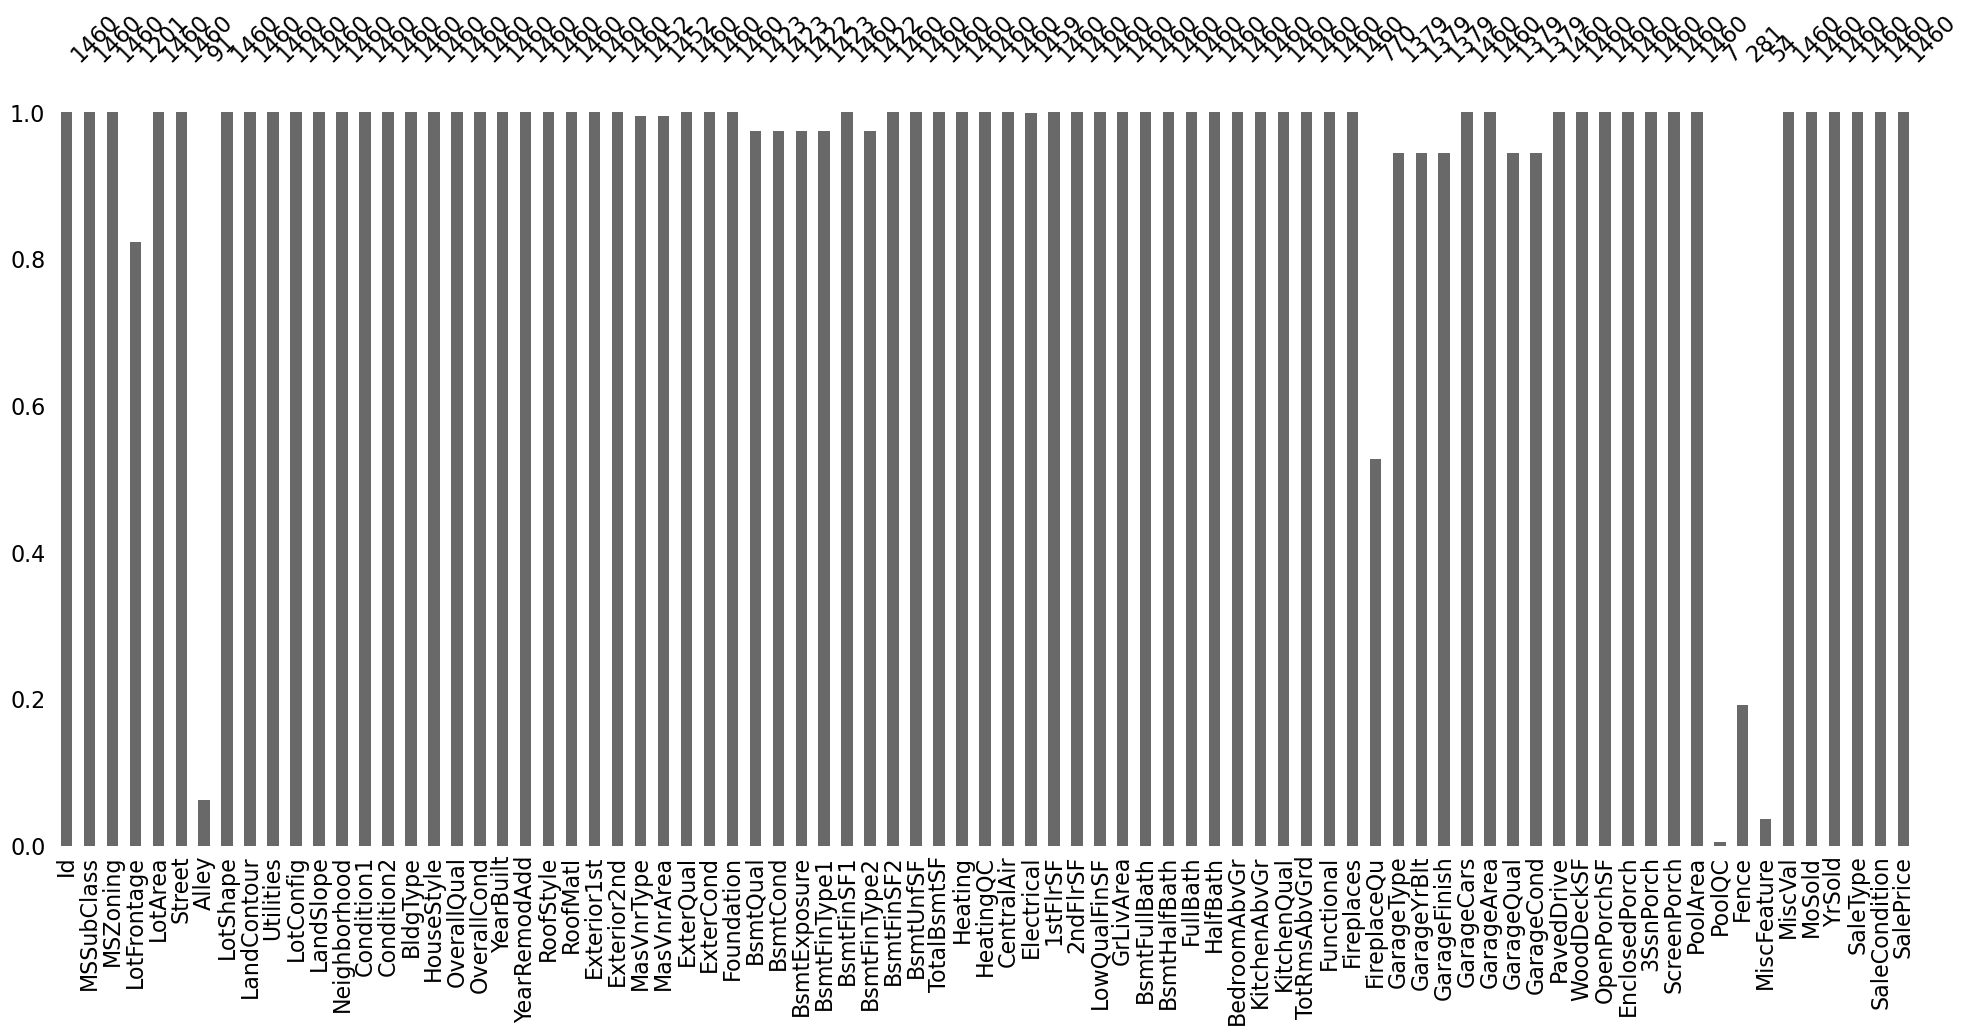

In [8]:
msno.bar(Data_train)

#### Insights:
Missing Data columns:
    Alley,
    PoolIQC,
    Fernce,
    Miscfeature
    
    Remove Id column as it is index column

    Dropping above columns
    
    FireplaceQC - 50% data missing check and treat
    

In [9]:
# Drop columns with high missing values
col_to_drop = ['Id','Alley','PoolQC','Fence','MiscFeature']
Data_train = Data_train.drop(col_to_drop, axis = 1)
Data_train.shape

(1460, 76)

### 2. Check and Removing the columns with only one value or having majorly(more than 80%) one value


In [10]:
col_zero_count = Data_train.eq(0).sum(axis=0)

In [11]:
col_zero_count[col_zero_count > 1000]

BsmtFinSF2       1293
LowQualFinSF     1434
BsmtHalfBath     1378
EnclosedPorch    1252
3SsnPorch        1436
ScreenPorch      1344
PoolArea         1453
MiscVal          1408
dtype: int64

In [12]:
Data_train.hist(bins=50,figsize=(20,15))

array([[<Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>,
        <Axes: title={'center': 'YearBuilt'}>],
       [<Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>,
        <Axes: title={'center': 'TotalBsmtSF'}>],
       [<Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>,
        <Axes: title={'center': 'BsmtHalfBath'}>],
       [<Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>,
        <Axes: title={'center': 'Bedroo

####Insights:
 There are columns having only/majorly zero as values which will not help with further analysis,
 Can remove those columns
 
 



In [13]:
Col_to_del = col_zero_count[col_zero_count > 1168]
#Data_train[Col_to_del].hist(bins=50,figsize=(20,15))

In [14]:
Col_to_drop_list = ['BsmtFinSF2','LowQualFinSF','BsmtHalfBath','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal']

array([[<Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'BsmtHalfBath'}>],
       [<Axes: title={'center': 'EnclosedPorch'}>,
        <Axes: title={'center': '3SsnPorch'}>,
        <Axes: title={'center': 'ScreenPorch'}>],
       [<Axes: title={'center': 'PoolArea'}>,
        <Axes: title={'center': 'MiscVal'}>, <Axes: >]], dtype=object)

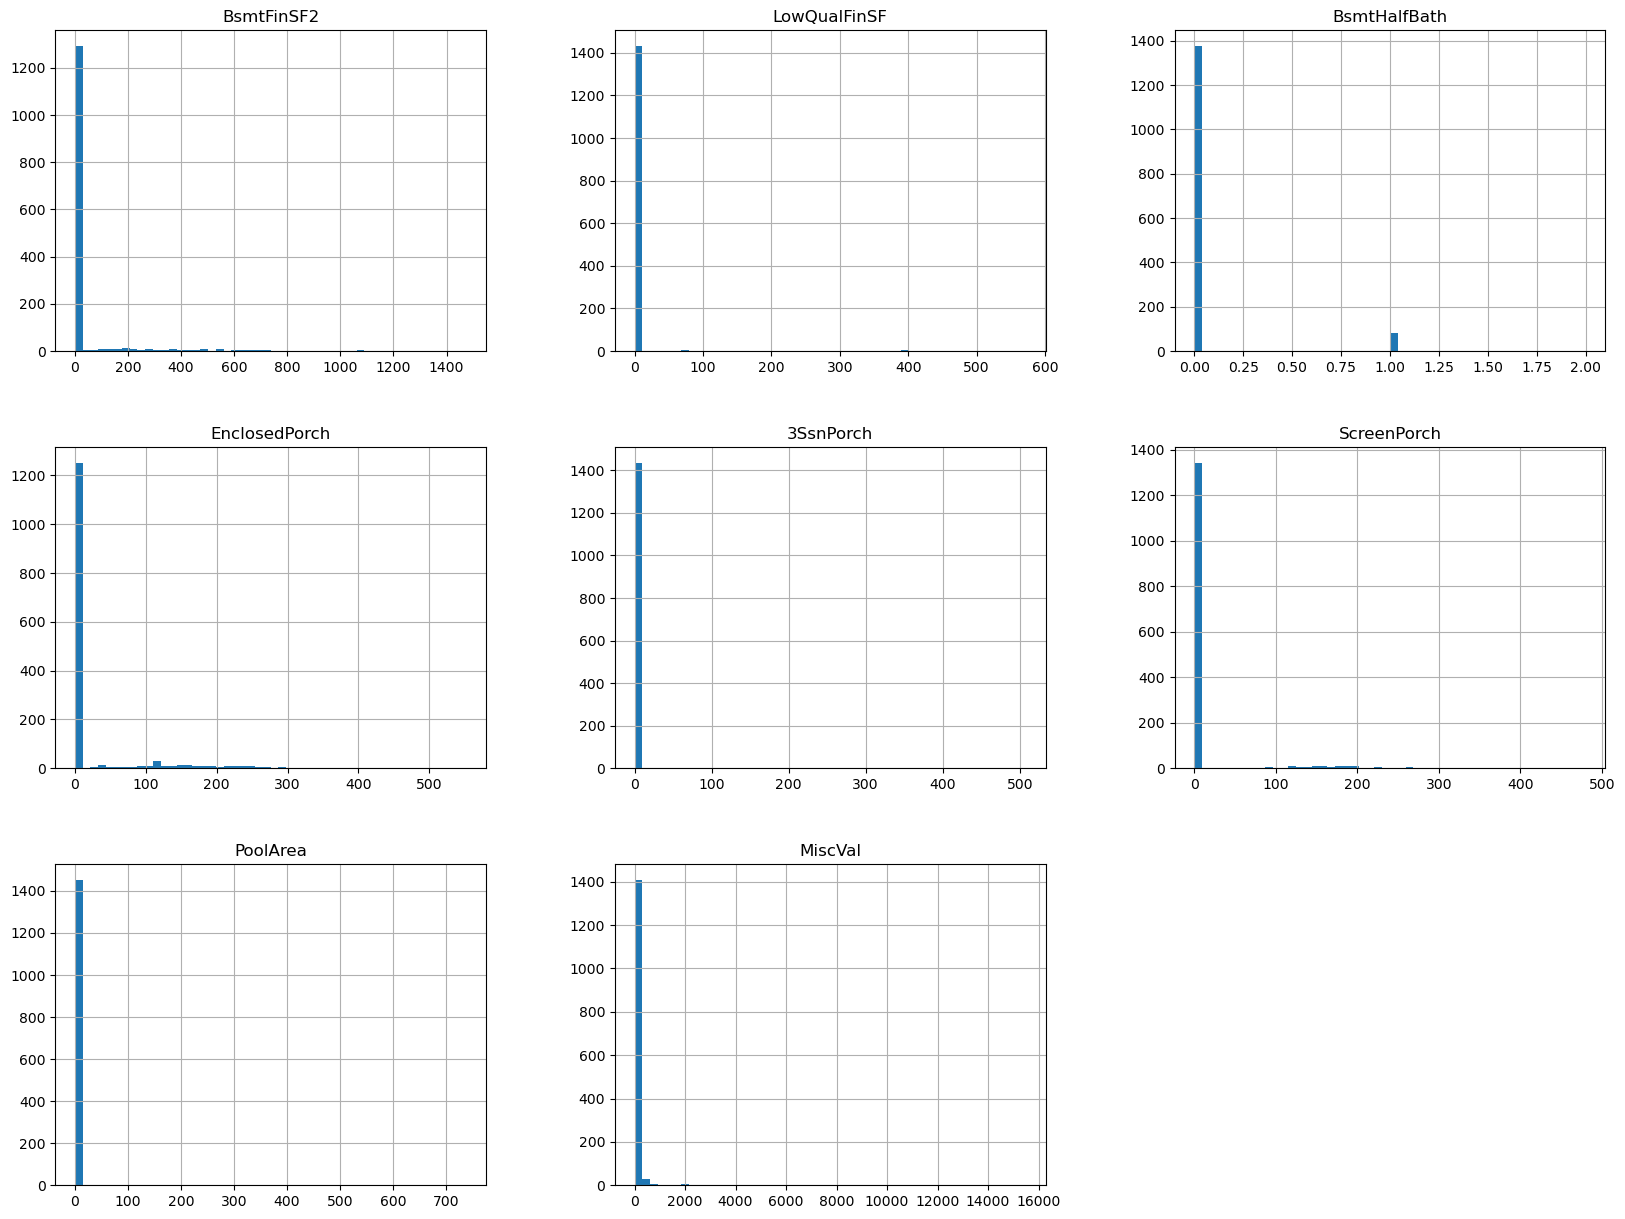

In [15]:
Data_train[Col_to_drop_list].hist(bins=50,figsize=(20,15))

In [16]:
#Drop columns where most of the values are zero
Data_train = Data_train.drop(Col_to_drop_list, axis = 1)
Data_train.shape

(1460, 68)

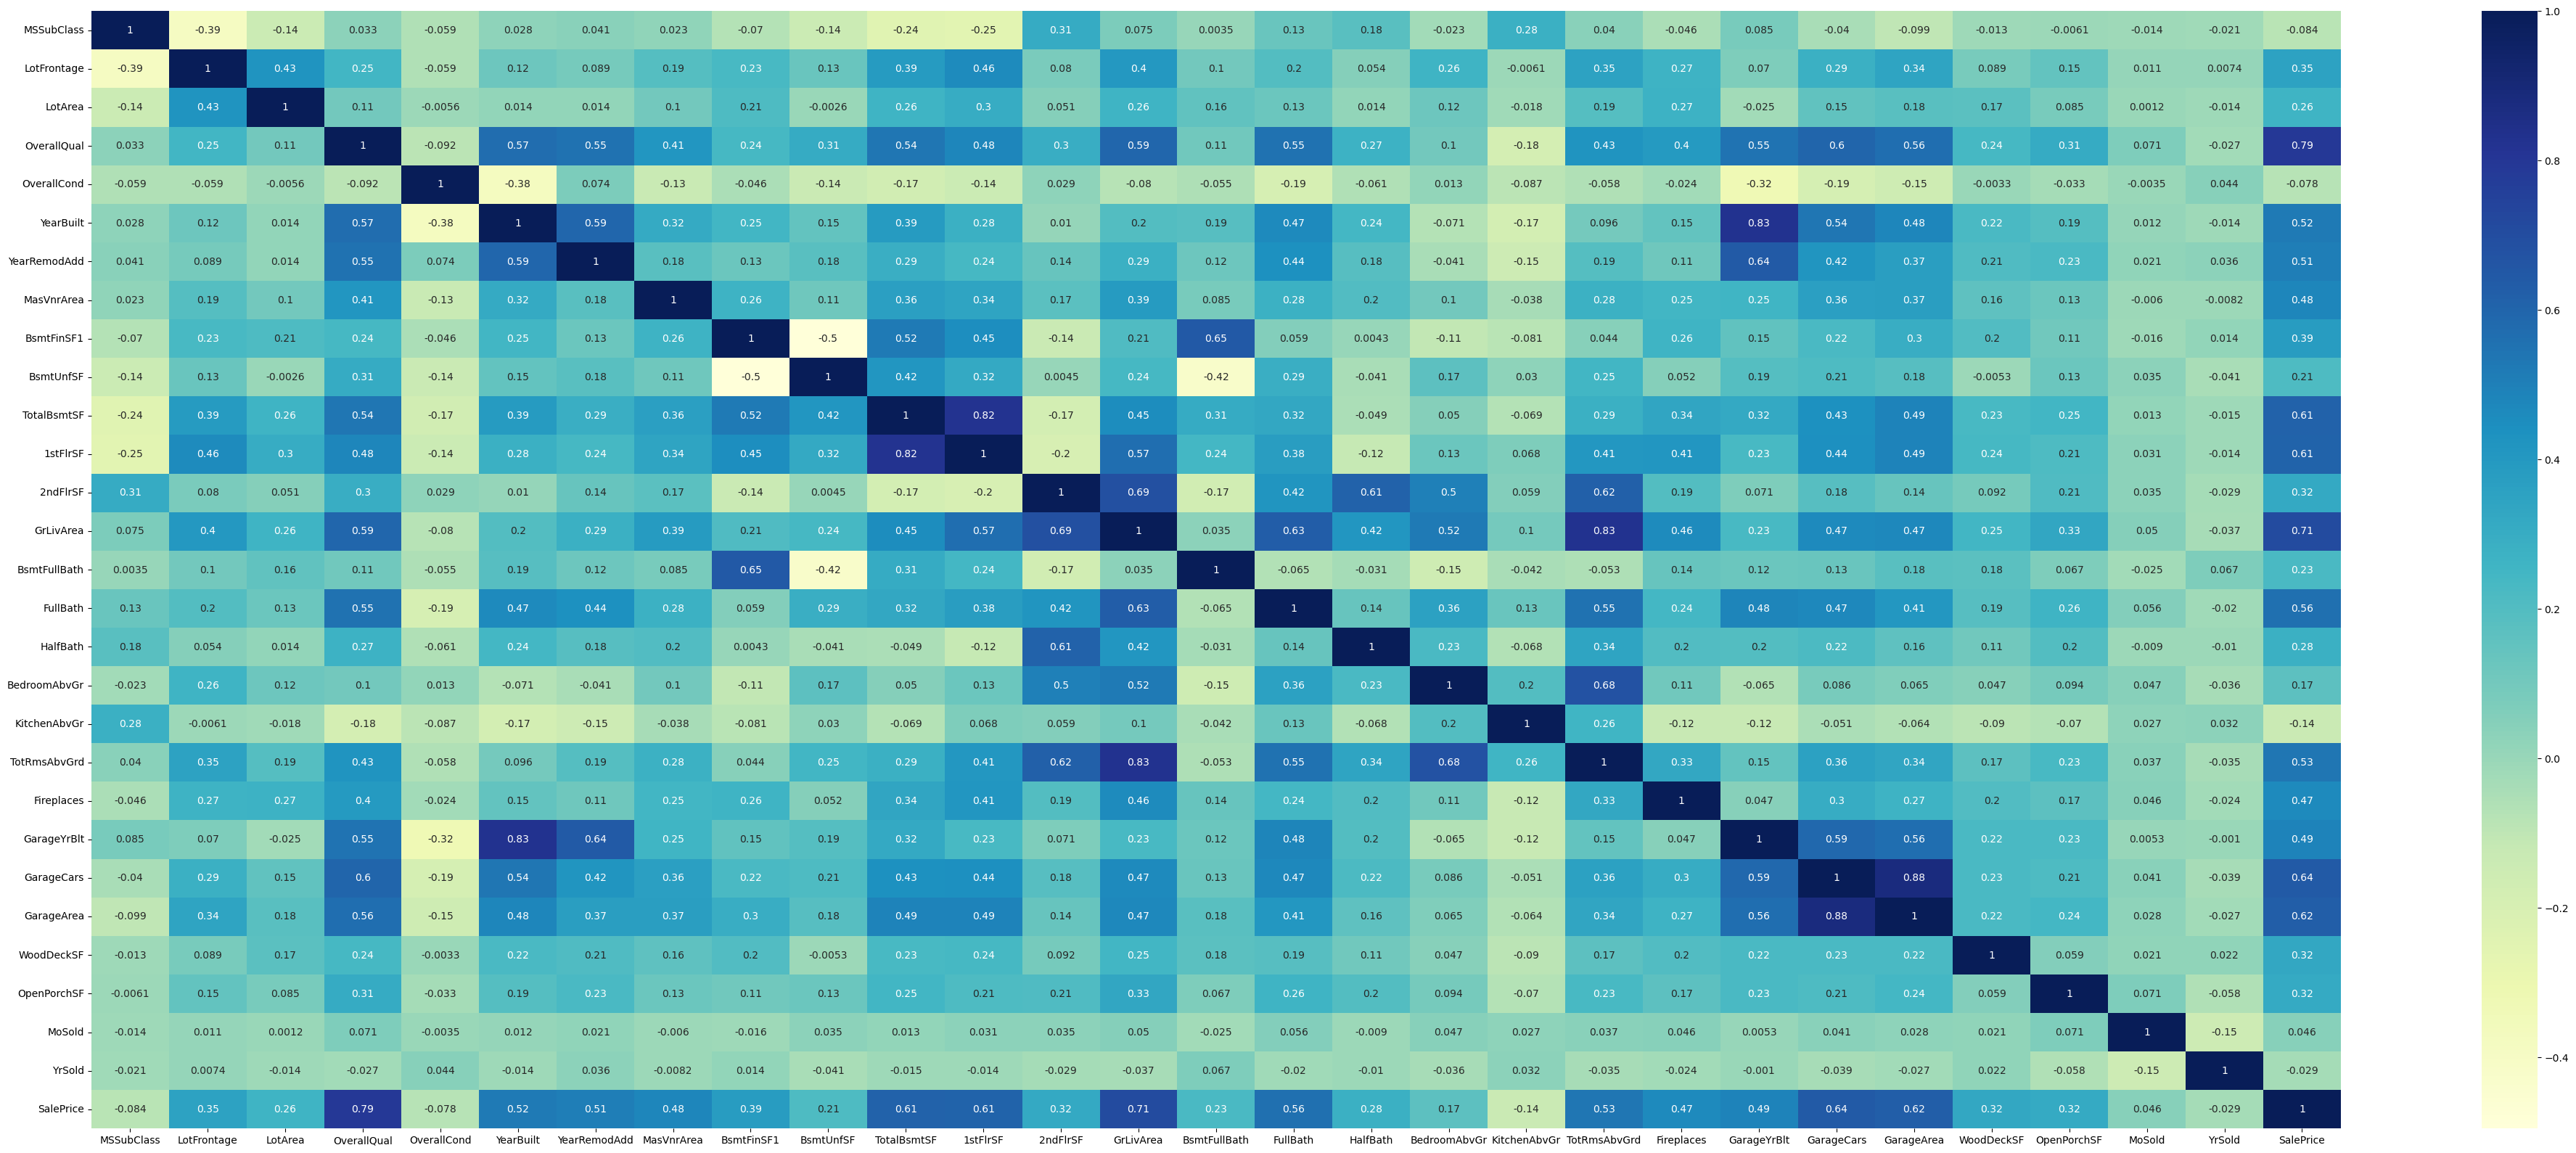

In [17]:
cor = Data_train.corr()
#plotting correlation heatmap
plt.figure(figsize=(50,20))
sns.heatmap(cor, cmap="YlGnBu", annot = True)

plt.show()

In [18]:
cor["SalePrice"].sort_values(ascending=False)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
LotFrontage     0.351799
WoodDeckSF      0.324413
2ndFlrSF        0.319334
OpenPorchSF     0.315856
HalfBath        0.284108
LotArea         0.263843
BsmtFullBath    0.227122
BsmtUnfSF       0.214479
BedroomAbvGr    0.168213
MoSold          0.046432
YrSold         -0.028923
OverallCond    -0.077856
MSSubClass     -0.084284
KitchenAbvGr   -0.135907
Name: SalePrice, dtype: float64

#### Insight
Highest correlation is with OverallQual -Saleprice - 0.79 (categorical variable),
next highest is GrLivArea 0.71 - check relationship by plotting graph with saleprice

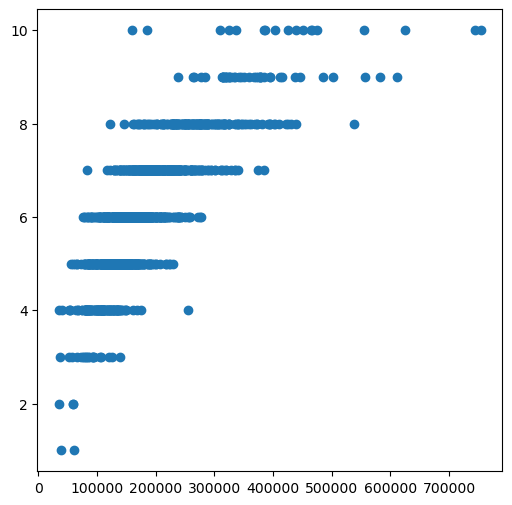

In [19]:
#pair plot with OverallQual (categorical variable) and saleprice
plt.figure(figsize = [6,6])
plt.scatter(Data_train.SalePrice,Data_train.OverallQual)
plt.show()

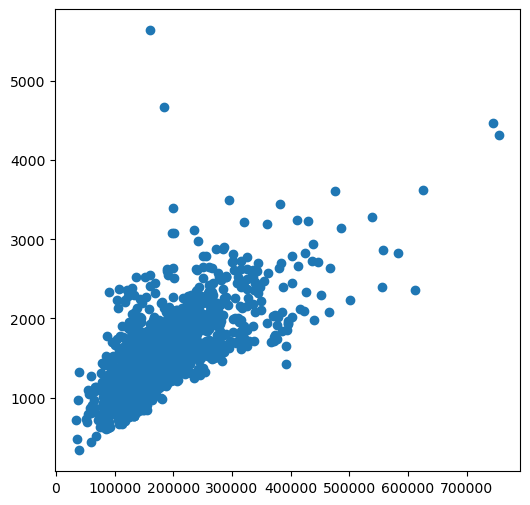

In [20]:
#pair plot with GrLivArea and saleprice
plt.figure(figsize = [6,6])
plt.scatter(Data_train.SalePrice,Data_train.GrLivArea)
plt.show()

#### Insight:

With some outliers - some linear relationship is observed

In [21]:
Data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 68 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

### Categorical Variable - Year

In [22]:
### Handling Year features
#YearBuilt      1460 non-null   int64  
#YearRemodAdd   1460 non-null   int64  
#YrSold         1460 non-null   int64
#GarageYrBlt    1379 non-null   float64


In [23]:
Data_train['age'] = Data_train['YrSold']-Data_train['YearBuilt']
Data_train['age'].describe()

count    1460.000000
mean       36.547945
std        30.250152
min         0.000000
25%         8.000000
50%        35.000000
75%        54.000000
max       136.000000
Name: age, dtype: float64

In [24]:
Data_train['age_Remod'] = Data_train['YrSold']-Data_train['YearRemodAdd']
Data_train['age_Remod'].describe()

count    1460.000000
mean       22.950000
std        20.640653
min        -1.000000
25%         4.000000
50%        14.000000
75%        41.000000
max        60.000000
Name: age_Remod, dtype: float64

In [25]:
Data_train['GarageYrBlt'].fillna(0.0,inplace=True)
Data_train['age_Garage'] = Data_train['YrSold']-Data_train['GarageYrBlt']
Data_train['age_Garage'].describe()

count    1460.000000
mean      139.076027
std       453.714026
min         0.000000
25%         7.000000
50%        30.000000
75%        50.000000
max      2010.000000
Name: age_Garage, dtype: float64

In [26]:
#delete the year columns
Col_to_drop_list = ['YearBuilt','YearRemodAdd','YrSold','GarageYrBlt']
Data_train = Data_train.drop(Col_to_drop_list, axis = 1)
Data_train.shape


(1460, 67)

In [27]:
cor = Data_train.corr()
#plotting correlation heatmap
plt.figure(figsize=(50,20))
sns.heatmap(cor, cmap="YlGnBu", annot = True)

plt.show()

### 3. Handling remaining Missing values

In [28]:
Data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 67 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  RoofStyle      1460 non-null   object 
 18  RoofMatl

In [29]:
# Handle all the rest of missing values with me value for numeric variables
Data_train.fillna(Data_train.median(),inplace=True)

In [30]:
Data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 67 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  RoofStyle      1460 non-null   object 
 18  RoofMatl

In [31]:
# Categorical variables
# Handle all the rest of missing values with NO as NA (not avaialable) is used if that feature not exist (eg. NA	No Basement data dictonary)
Data_train.fillna('NO',inplace=True)

In [32]:
Data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 67 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  RoofStyle      1460 non-null   object 
 18  RoofMatl

### Categorical Variable

In [33]:
#list of cat variables converted to dummy variables
cat_col_list = []
#list of features need to be deleted which has one value more than 80%
col_del_list = []


In [34]:
Data_train['MSSubClass'].astype('category').value_counts()

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

In [35]:
MSSubClass = pd.get_dummies(Data_train.MSSubClass,drop_first=True)
MSSubClass = MSSubClass.add_prefix("MSSubClass_")
cat_col_list.append('MSSubClass')
MSSubClass

MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  \
0                 0              0              0              0   
1                 0              0              0              0   
2                 0              0              0              0   
3                 0              0              0              0   
4                 0              0              0              0   
...             ...            ...            ...            ...   
1455              0              0              0              0   
1456              0              0              0              0   
1457              0              0              0              0   
1458              0              0              0              0   
1459              0              0              0              0   

      MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  \
0                 1              0              0              0   
1                 0              0              0              0   
2                 1              0              0              0   
3                 0              1              0              0   
4                 1              0              0              0   
...             ...            ...            ...            ...   
1455              1              0              0              0   
1456              0              0              0              0   
1457              0              1              0              0   
1458              0              0              0              0   
1459              0              0              0              0   

      MSSubClass_85  MSSubClass_90  MSSubClass_120  MSSubClass_160  \
0                 0              0               0               0   
1                 0              0               0               0   
2                 0              0               0               0   
3                 0              0               0               0   
4                 0              0               0               0   
...             ...            ...             ...             ...   
1455              0              0               0               0   
1456              0              0               0               0   
1457              0              0               0               0   
1458              0              0               0               0   
1459              0              0               0               0   

      MSSubClass_180  MSSubClass_190  
0                  0               0  
1                  0               0  
2                  0               0  
3                  0               0  
4                  0               0  
...              ...             ...  
1455               0               0  
1456               0               0  
1457               0               0  
1458               0               0  
1459               0               0  

[1460 rows x 14 columns]

In [36]:
Data_train['MSZoning'].astype('category').value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [37]:
MSZoning = pd.get_dummies(Data_train.MSZoning,drop_first=True)
MSZoning = MSZoning.add_prefix("MSZoning_")
cat_col_list.append('MSZoning')

In [38]:
Data_train['Street'].astype('category').value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [39]:
col_del_list.append('Street')

#### Insight :
more than 90% is having same value so this column can be deleted

In [40]:
Data_train['LotShape'].astype('category').value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [41]:
LotShape = pd.get_dummies(Data_train.LotShape,drop_first=True)
LotShape = LotShape.add_prefix("LotShape_")
cat_col_list.append('LotShape')

In [42]:

Data_train['LandContour'].astype('category').value_counts()

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

In [43]:
col_del_list.append('LandContour')

In [44]:
Data_train['Utilities'].astype('category').value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [45]:
col_del_list.append('Utilities')

#### Insight:
more than 80% is having same value so this column can be deleted

In [46]:
Data_train['LotConfig'].astype('category').value_counts()

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

In [47]:
LotConfig = pd.get_dummies(Data_train.LotConfig,drop_first=True)
LotConfig = LotConfig.add_prefix("LotConfig_")
cat_col_list.append('LotConfig')

In [48]:
Data_train['LandSlope'].astype('category').value_counts()

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

In [49]:
col_del_list.append('LandSlope')

In [50]:
Data_train['Neighborhood'].astype('category').value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [51]:
Neighborhood = pd.get_dummies(Data_train.Neighborhood,drop_first=True)
Neighborhood = Neighborhood.add_prefix("Neighborhood_")
cat_col_list.append('Neighborhood')

In [52]:
Data_train['Condition1'].astype('category').value_counts()

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

In [53]:
col_del_list.append('Condition1')

In [54]:
Data_train['Condition2'].astype('category').value_counts()

Norm      1445
Feedr        6
Artery       2
PosN         2
RRNn         2
PosA         1
RRAe         1
RRAn         1
Name: Condition2, dtype: int64

In [55]:
col_del_list.append('Condition2')

In [56]:
Data_train['BldgType'].astype('category').value_counts()

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

In [57]:
col_del_list.append('BldgType')

In [58]:
Data_train['HouseStyle'].astype('category').value_counts()

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

In [59]:
HouseStyle = pd.get_dummies(Data_train.HouseStyle,drop_first=True)
HouseStyle = HouseStyle.add_prefix("HouseStyle_")
cat_col_list.append('HouseStyle')

In [60]:
Data_train['RoofStyle'].astype('category').value_counts()

Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64

In [61]:
RoofStyle = pd.get_dummies(Data_train.RoofStyle,drop_first=True)
RoofStyle = RoofStyle.add_prefix("RoofStyle_")
cat_col_list.append('RoofStyle')

In [62]:
Data_train['RoofMatl'].astype('category').value_counts()

CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
ClyTile       1
Membran       1
Metal         1
Roll          1
Name: RoofMatl, dtype: int64

In [63]:
# Add to del list
col_del_list.append('RoofMatl')

In [64]:
Data_train['Exterior1st'].astype('category').value_counts()

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
CBlock       1
ImStucc      1
Name: Exterior1st, dtype: int64

In [65]:
Exterior1st = pd.get_dummies(Data_train.Exterior1st,drop_first=True)
Exterior1st = Exterior1st.add_prefix("Exterior1st_")
cat_col_list.append('Exterior1st')

In [66]:
Data_train['Exterior2nd'].astype('category').value_counts()

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
CBlock       1
Other        1
Name: Exterior2nd, dtype: int64

In [67]:
Exterior2nd = pd.get_dummies(Data_train.Exterior2nd,drop_first=True)
Exterior2nd = Exterior2nd.add_prefix("Exterior2nd_")
cat_col_list.append('Exterior2nd')

In [68]:
Data_train['MasVnrType'].astype('category').value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
NO           8
Name: MasVnrType, dtype: int64

In [69]:
MasVnrType = pd.get_dummies(Data_train.MasVnrType,drop_first=True)
MasVnrType = MasVnrType.add_prefix("MasVnrType_")
cat_col_list.append('MasVnrType')

In [70]:
Data_train['ExterQual'].astype('category').value_counts()

TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64

In [71]:
ExterQual = pd.get_dummies(Data_train.ExterQual,drop_first=True)
ExterQual = ExterQual.add_prefix("ExterQual_")
cat_col_list.append('ExterQual')

In [72]:
Data_train['ExterCond'].astype('category').value_counts()

TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64

In [73]:
# Add to del list
col_del_list.append('ExterCond')

In [74]:
Data_train['Foundation'].astype('category').value_counts()

PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64

In [75]:
Foundation = pd.get_dummies(Data_train.Foundation,drop_first=True)
Foundation = Foundation.add_prefix("Foundation_")
cat_col_list.append('Foundation')

In [76]:
Data_train['BsmtQual'].astype('category').value_counts()

TA    649
Gd    618
Ex    121
NO     37
Fa     35
Name: BsmtQual, dtype: int64

In [77]:
BsmtQual = pd.get_dummies(Data_train.BsmtQual,drop_first=True)
BsmtQual = BsmtQual.add_prefix("BsmtQual_")
cat_col_list.append('BsmtQual')

In [78]:
Data_train['BsmtCond'].astype('category').value_counts()

TA    1311
Gd      65
Fa      45
NO      37
Po       2
Name: BsmtCond, dtype: int64

In [79]:
# Add to del list
col_del_list.append('BsmtCond')

In [80]:
Data_train['BsmtExposure'].astype('category').value_counts()

No    953
Av    221
Gd    134
Mn    114
NO     38
Name: BsmtExposure, dtype: int64

In [81]:
BsmtExposure = pd.get_dummies(Data_train.BsmtExposure,drop_first=True)
BsmtExposure = BsmtExposure.add_prefix("BsmtExposure_")
cat_col_list.append('BsmtExposure')

In [82]:
Data_train['BsmtFinType1'].astype('category').value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
NO      37
Name: BsmtFinType1, dtype: int64

In [83]:
BsmtFinType1 = pd.get_dummies(Data_train.BsmtFinType1,drop_first=True)
BsmtFinType1 = BsmtFinType1.add_prefix("BsmtFinType1_")
cat_col_list.append('BsmtFinType1')

In [84]:
Data_train['BsmtFinType2'].astype('category').value_counts()

Unf    1256
Rec      54
LwQ      46
NO       38
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [85]:
# Add to del list
col_del_list.append('BsmtFinType2')

In [86]:
Data_train['Heating'].astype('category').value_counts()

GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64

In [87]:
# Add to del list
col_del_list.append('Heating')

In [88]:
Data_train['HeatingQC'].astype('category').value_counts()

Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64

In [89]:
HeatingQC = pd.get_dummies(Data_train.HeatingQC,drop_first=True)
HeatingQC = HeatingQC.add_prefix("HeatingQC_")
cat_col_list.append('HeatingQC')

In [90]:
Data_train['CentralAir'].astype('category').value_counts()

Y    1365
N      95
Name: CentralAir, dtype: int64

In [91]:
# Add to del list
col_del_list.append('CentralAir')

In [92]:
Data_train['Electrical'].astype('category').value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
NO          1
Name: Electrical, dtype: int64

In [93]:
# Add to del list
col_del_list.append('Electrical')

In [94]:
Data_train['KitchenQual'].astype('category').value_counts()

TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64

In [95]:
KitchenQual = pd.get_dummies(Data_train.KitchenQual,drop_first=True)
KitchenQual = KitchenQual.add_prefix("KitchenQual_")
cat_col_list.append('KitchenQual')

In [96]:
Data_train['Functional'].astype('category').value_counts()

Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64

In [97]:
# Add to del list
col_del_list.append('Functional')

In [98]:
Data_train['Fireplaces'].astype('category').value_counts()

0    690
1    650
2    115
3      5
Name: Fireplaces, dtype: int64

In [99]:
Data_train['FireplaceQu'].astype('category').value_counts()

NO    690
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [100]:
FireplaceQu = pd.get_dummies(Data_train.FireplaceQu,drop_first=True)
FireplaceQu = FireplaceQu.add_prefix("FireplaceQu_")
cat_col_list.append('FireplaceQu')

#### Insight - Handle missing values of FireplaceQC
 missing values are for Fireplaces - 0, replace NA with NF - No Fireplace

In [101]:
### Handling missing values of FireplaceQU  - missing values are for Fireplaces - 0, replace NA with NO - No Fireplace
#Data_train.FireplaceQu.fillna('NO',inplace=True)
#Data_train['FireplaceQu'].astype('category').value_counts()

In [102]:
Data_train['GarageType'].astype('category').value_counts()

Attchd     870
Detchd     387
BuiltIn     88
NO          81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [103]:
GarageType = pd.get_dummies(Data_train.GarageType,drop_first=True)
GarageType = GarageType.add_prefix("GarageType_")
cat_col_list.append('GarageType')

In [104]:
Data_train['GarageFinish'].astype('category').value_counts()

Unf    605
RFn    422
Fin    352
NO      81
Name: GarageFinish, dtype: int64

In [105]:
GarageFinish = pd.get_dummies(Data_train.GarageFinish,drop_first=True)
GarageFinish = GarageFinish.add_prefix("GarageFinish_")
cat_col_list.append('GarageFinish')

In [106]:
Data_train['GarageQual'].astype('category').value_counts()

TA    1311
NO      81
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

In [107]:
# Add to del list
col_del_list.append('GarageQual')

In [108]:
Data_train['GarageCond'].astype('category').value_counts()

TA    1326
NO      81
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [109]:
# Add to del list
col_del_list.append('GarageCond')

In [110]:
Data_train['PavedDrive'].astype('category').value_counts()

Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64

In [111]:
# Add to del list
col_del_list.append('PavedDrive')

In [112]:
Data_train['SaleType'].astype('category').value_counts()

WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

In [113]:
# Add to del list
col_del_list.append('SaleType')

In [114]:
Data_train['SaleCondition'].astype('category').value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

In [115]:
# Add to del list
col_del_list.append('SaleCondition')

In [116]:

Data_train['KitchenAbvGr'].astype('category').value_counts().plot.bar()

<Axes: >

In [117]:
# Add to del list
col_del_list.append('KitchenAbvGr')

In [118]:
#numeric cat varaibles
OverallQual = pd.get_dummies(Data_train.OverallQual,drop_first=True)
OverallQual = OverallQual.add_prefix("OverallQual_")
cat_col_list.append('OverallQual')

In [119]:
#numeric cat varaibles
OverallCond = pd.get_dummies(Data_train.OverallCond,drop_first=True)
OverallCond = OverallCond.add_prefix("OverallCond_")
cat_col_list.append('OverallCond')

In [120]:
#numeric cat varaibles month
MoSold = pd.get_dummies(Data_train.MoSold,drop_first=True)
MoSold = MoSold.add_prefix("MoSold_")
cat_col_list.append('MoSold')

In [121]:
# delete the feature having 80% or more same values 1460*0.8 = 1168
#col_list_del = ['Street','Utilities','LandContour','LandSlope','Condition1','Condition2','BldgType','RoofMatl','ExterCond','BsmtCond','BsmtFinType2','Heating','CentralAir','Electrical','Functional','GarageQual','GarageCond','PavedDrive','SaleType','SaleCondition','KitchenAbvGr']
Data_train = Data_train.drop(col_del_list, axis = 1)
Data_train.shape

(1460, 46)

In [122]:
Data_train.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig Neighborhood  \
0          60       RL         65.0     8450      Reg    Inside      CollgCr   
1          20       RL         80.0     9600      Reg       FR2      Veenker   
2          60       RL         68.0    11250      IR1    Inside      CollgCr   
3          70       RL         60.0     9550      IR1    Corner      Crawfor   
4          60       RL         84.0    14260      IR1       FR2      NoRidge   

  HouseStyle  OverallQual  OverallCond  ... GarageFinish GarageCars  \
0     2Story            7            5  ...          RFn          2   
1     1Story            6            8  ...          RFn          2   
2     2Story            7            5  ...          RFn          2   
3     2Story            7            5  ...          Unf          3   
4     2Story            8            5  ...          RFn          3   

  GarageArea WoodDeckSF  OpenPorchSF MoSold SalePrice age age_Remod age_Garage  
0        548          0           61      2    208500   5         5        5.0  
1        460        298            0      5    181500  31        31       31.0  
2        608          0           42      9    223500   7         6        7.0  
3        642          0           35      2    140000  91        36        8.0  
4        836        192           84     12    250000   8         8        8.0  

[5 rows x 46 columns]

#### Insight:

After deleting unwanted columns there are 46 featues

In [123]:
Data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 46 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    1460 non-null   int64  
 1   MSZoning      1460 non-null   object 
 2   LotFrontage   1460 non-null   float64
 3   LotArea       1460 non-null   int64  
 4   LotShape      1460 non-null   object 
 5   LotConfig     1460 non-null   object 
 6   Neighborhood  1460 non-null   object 
 7   HouseStyle    1460 non-null   object 
 8   OverallQual   1460 non-null   int64  
 9   OverallCond   1460 non-null   int64  
 10  RoofStyle     1460 non-null   object 
 11  Exterior1st   1460 non-null   object 
 12  Exterior2nd   1460 non-null   object 
 13  MasVnrType    1460 non-null   object 
 14  MasVnrArea    1460 non-null   float64
 15  ExterQual     1460 non-null   object 
 16  Foundation    1460 non-null   object 
 17  BsmtQual      1460 non-null   object 
 18  BsmtExposure  1460 non-null 

In [124]:
#Display categorical variables list
cat_col_list

['MSSubClass',
 'MSZoning',
 'LotShape',
 'LotConfig',
 'Neighborhood',
 'HouseStyle',
 'RoofStyle',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'Foundation',
 'BsmtQual',
 'BsmtExposure',
 'BsmtFinType1',
 'HeatingQC',
 'KitchenQual',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'OverallQual',
 'OverallCond',
 'MoSold']

In [125]:
#Drop the categorical variables from the Data_train(maintable)
Data_train = Data_train.drop(cat_col_list,axis = 1)

#create table for all dummy variables (categorical variables)
cat_concat = pd.concat([MSSubClass, MSZoning, LotShape, LotConfig, Neighborhood, HouseStyle, RoofStyle, Exterior1st,
 Exterior2nd, MasVnrType, ExterQual, Foundation, BsmtQual, BsmtExposure, BsmtFinType1, HeatingQC, KitchenQual,
 FireplaceQu, GarageType, GarageFinish, OverallQual, OverallCond, MoSold], axis = 1)

#concat dummy variables table to the main table
Data_train = pd.concat([Data_train,cat_concat], axis = 1)

In [126]:
Data_train.shape

(1460, 188)

#### Insights:
After deletion of unwanted columns and creating dummy variables there are 188 columns with 1460 rows in the Data_train table

In [127]:
cor = Data_train.corr()
#plotting correlation heatmap
#plt.figure(figsize=(50,20))
#sns.heatmap(cor, cmap="YlGnBu", annot = True)
#plt.show()
cor

LotFrontage   LotArea  MasVnrArea  BsmtFinSF1  BsmtUnfSF  \
LotFrontage     1.000000  0.304522    0.178469    0.214367   0.124098   
LotArea         0.304522  1.000000    0.103321    0.214103  -0.002618   
MasVnrArea      0.178469  0.103321    1.000000    0.261256   0.113862   
BsmtFinSF1      0.214367  0.214103    0.261256    1.000000  -0.495251   
BsmtUnfSF       0.124098 -0.002618    0.113862   -0.495251   1.000000   
...                  ...       ...         ...         ...        ...   
MoSold_8       -0.036235  0.019117    0.009243   -0.009820   0.016158   
MoSold_9        0.042033  0.004245   -0.002265    0.006186   0.022900   
MoSold_10      -0.027674 -0.032004    0.004953    0.012646   0.016096   
MoSold_11       0.060188  0.016914    0.013301    0.045063  -0.004482   
MoSold_12      -0.010418 -0.001071   -0.010876   -0.009999   0.026173   

             TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  ...  \
LotFrontage     0.363472  0.413773  0.072388   0.368007      0.090343  ...   
LotArea         0.260833  0.299475  0.050986   0.263116      0.158155  ...   
MasVnrArea      0.360067  0.339850  0.173800   0.388052      0.083010  ...   
BsmtFinSF1      0.522396  0.445863 -0.137079   0.208171      0.649212  ...   
BsmtUnfSF       0.415360  0.317987  0.004469   0.240257     -0.422900  ...   
...                  ...       ...       ...        ...           ...  ...   
MoSold_8        0.004755  0.010161  0.023561   0.026972      0.010059  ...   
MoSold_9        0.026563  0.027410  0.030732   0.050365     -0.031169  ...   
MoSold_10       0.027637  0.038300 -0.045281  -0.009479     -0.004721  ...   
MoSold_11       0.042519  0.045191  0.018278   0.045770      0.043177  ...   
MoSold_12       0.005557  0.007704 -0.006716  -0.000837     -0.020754  ...   

             MoSold_3  MoSold_4  MoSold_5  MoSold_6  MoSold_7  MoSold_8  \
LotFrontage  0.015397 -0.068741 -0.008092  0.003820  0.014998 -0.036235   
LotArea      0.002208 -0.032536 -0.042141  0.064209 -0.018250  0.019117   
MasVnrArea   0.033699 -0.043721 -0.053327  0.024093 -0.002133  0.009243   
BsmtFinSF1   0.008234  0.003818 -0.020406 -0.024166 -0.035538 -0.009820   
BsmtUnfSF    0.017249 -0.023770 -0.028910 -0.021212  0.016779  0.016158   
...               ...       ...       ...       ...       ...       ...   
MoSold_8    -0.084488 -0.098728 -0.121695 -0.138248 -0.131921  1.000000   
MoSold_9    -0.059418 -0.069432 -0.085584 -0.097225 -0.092776 -0.064124   
MoSold_10   -0.071289 -0.083304 -0.102683 -0.116650 -0.111311 -0.076936   
MoSold_11   -0.066921 -0.078199 -0.096391 -0.109502 -0.104491 -0.072222   
MoSold_12   -0.057418 -0.067096 -0.082704 -0.093954 -0.089654 -0.061967   

             MoSold_9  MoSold_10  MoSold_11  MoSold_12  
LotFrontage  0.042033  -0.027674   0.060188  -0.010418  
LotArea      0.004245  -0.032004   0.016914  -0.001071  
MasVnrArea  -0.002265   0.004953   0.013301  -0.010876  
BsmtFinSF1   0.006186   0.012646   0.045063  -0.009999  
BsmtUnfSF    0.022900   0.016096  -0.004482   0.026173  
...               ...        ...        ...        ...  
MoSold_8    -0.064124  -0.076936  -0.072222  -0.061967  
MoSold_9     1.000000  -0.054106  -0.050791  -0.043579  
MoSold_10   -0.054106   1.000000  -0.060939  -0.052286  
MoSold_11   -0.050791  -0.060939   1.000000  -0.049082  
MoSold_12   -0.043579  -0.052286  -0.049082   1.000000  

[188 rows x 188 columns]

In [128]:
cor["SalePrice"].sort_values(ascending=False)

SalePrice         1.000000
GrLivArea         0.708624
GarageCars        0.640409
GarageArea        0.623431
TotalBsmtSF       0.613581
                    ...   
FireplaceQu_NO   -0.471908
age_Remod        -0.509079
KitchenQual_TA   -0.519298
age              -0.523350
ExterQual_TA     -0.589044
Name: SalePrice, Length: 188, dtype: float64

## Step 3: Reduce the features using RFE

## Split Train and Test Data


In [129]:
#import sklearn for splittling 
from sklearn.model_selection import train_test_split

In [130]:
np.random.seed(0)
#Data split into 70:30 ratio of train and test set
df_train, df_test = train_test_split(Data_train, train_size = 0.7, test_size = 0.3, random_state=100 )

## Model preparation

In [131]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [132]:
num_val_col = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea',
              'BsmtFullBath','FullBath','HalfBath','BedroomAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea',
              'WoodDeckSF','OpenPorchSF','age','age_Remod','age_Garage','SalePrice']

In [133]:
df_train[num_val_col] = scaler.fit_transform(df_train[num_val_col])

In [134]:
df_train.describe()

LotFrontage      LotArea   MasVnrArea   BsmtFinSF1    BsmtUnfSF  \
count  1021.000000  1021.000000  1021.000000  1021.000000  1021.000000   
mean      0.166249     0.042143     0.065306     0.079337     0.241388   
std       0.075615     0.048226     0.117088     0.082377     0.192066   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.133562     0.027923     0.000000     0.000000     0.092466   
50%       0.164384     0.037531     0.000000     0.069454     0.197774   
75%       0.195205     0.046943     0.098750     0.126152     0.345034   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

       TotalBsmtSF     1stFlrSF     2ndFlrSF    GrLivArea  BsmtFullBath  ...  \
count  1021.000000  1021.000000  1021.000000  1021.000000   1021.000000  ...   
mean      0.173773     0.184341     0.165943     0.207345      0.146588  ...   
std       0.075145     0.092132     0.210799     0.102232      0.175127  ...   
min       0.000000     0.000000     0.000000     0.000000      0.000000  ...   
25%       0.129787     0.116435     0.000000     0.133743      0.000000  ...   
50%       0.162357     0.165278     0.000000     0.197540      0.000000  ...   
75%       0.215057     0.243056     0.352058     0.255573      0.333333  ...   
max       1.000000     1.000000     1.000000     1.000000      1.000000  ...   

          MoSold_3     MoSold_4     MoSold_5     MoSold_6     MoSold_7  \
count  1021.000000  1021.000000  1021.000000  1021.000000  1021.000000   
mean      0.070519     0.110676     0.142997     0.169442     0.147894   
std       0.256145     0.313884     0.350241     0.375325     0.355169   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

          MoSold_8     MoSold_9    MoSold_10    MoSold_11    MoSold_12  
count  1021.000000  1021.000000  1021.000000  1021.000000  1021.000000  
mean      0.078355     0.041136     0.061704     0.057786     0.042116  
std       0.268860     0.198702     0.240735     0.233454     0.200951  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000     0.000000     0.000000  
50%       0.000000     0.000000     0.000000     0.000000     0.000000  
75%       0.000000     0.000000     0.000000     0.000000     0.000000  
max       1.000000     1.000000     1.000000     1.000000     1.000000  

[8 rows x 188 columns]

In [135]:
#divide X and y variables
y_train = df_train.pop('SalePrice')
X_train = df_train

## RFE - Recursive Feature Eliminanation

In [136]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [137]:
#Running RFE with the output features = 40
lm = LinearRegression()
lm.fit(X_train,y_train)

rfe = RFE(lm, n_features_to_select = 40)
rfe = rfe.fit(X_train,y_train)

In [138]:
list(zip(X_train.columns, rfe.support_,rfe.ranking_))

[('LotFrontage', True, 1),
 ('LotArea', True, 1),
 ('MasVnrArea', False, 70),
 ('BsmtFinSF1', False, 37),
 ('BsmtUnfSF', False, 130),
 ('TotalBsmtSF', False, 38),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('GrLivArea', False, 77),
 ('BsmtFullBath', True, 1),
 ('FullBath', False, 15),
 ('HalfBath', False, 92),
 ('BedroomAbvGr', False, 114),
 ('TotRmsAbvGrd', False, 112),
 ('Fireplaces', False, 120),
 ('GarageCars', True, 1),
 ('GarageArea', True, 1),
 ('WoodDeckSF', False, 54),
 ('OpenPorchSF', False, 91),
 ('age', True, 1),
 ('age_Remod', False, 45),
 ('age_Garage', False, 121),
 ('MSSubClass_30', False, 107),
 ('MSSubClass_40', False, 97),
 ('MSSubClass_45', False, 102),
 ('MSSubClass_50', False, 80),
 ('MSSubClass_60', False, 147),
 ('MSSubClass_70', False, 76),
 ('MSSubClass_75', False, 20),
 ('MSSubClass_80', False, 144),
 ('MSSubClass_85', False, 59),
 ('MSSubClass_90', True, 1),
 ('MSSubClass_120', False, 2),
 ('MSSubClass_160', True, 1),
 ('MSSubClass_180', False, 19),
 (

In [139]:
#selected list 
col_list = X_train.columns[rfe.support_]
col_list

Index(['LotFrontage', 'LotArea', '1stFlrSF', '2ndFlrSF', 'BsmtFullBath',
       'GarageCars', 'GarageArea', 'age', 'MSSubClass_90', 'MSSubClass_160',
       'LotShape_IR3', 'Neighborhood_Crawfor', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Exterior1st_BrkFace', 'Exterior1st_ImStucc', 'Exterior2nd_ImStucc',
       'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_NO', 'BsmtQual_TA',
       'BsmtExposure_Gd', 'BsmtFinType1_NO', 'HeatingQC_Po', 'KitchenQual_Fa',
       'KitchenQual_Gd', 'KitchenQual_TA', 'OverallQual_8', 'OverallQual_9',
       'OverallQual_10', 'OverallCond_2', 'OverallCond_3', 'OverallCond_4',
       'OverallCond_5', 'OverallCond_6', 'OverallCond_7', 'OverallCond_8',
       'OverallCond_9'],
      dtype='object')

In [140]:
X_train_rfe = X_train[col_list]

In [141]:
import statsmodels.api as sm

#creating model
X_train_rfe = sm.add_constant(X_train_rfe)

#create fitting model
lm = sm.OLS(y_train, X_train_rfe).fit()

In [142]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     157.9
Date:                Sun, 22 Oct 2023   Prob (F-statistic):               0.00
Time:                        16:14:10   Log-Likelihood:                 1820.0
No. Observations:                1021   AIC:                            -3560.
Df Residuals:                     981   BIC:                            -3363.
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1048 

In [143]:
#residual analysis of the training data
#predict the value y_train_pred
y_train_pred = lm.predict(X_train_rfe)

Text(0.5, 0, 'error')

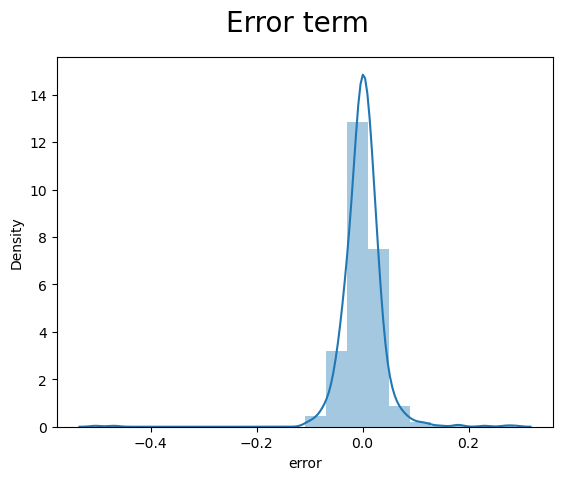

In [144]:
# plot histogram for error term
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle("Error term" , fontsize = 20)
plt.xlabel("error",fontsize = 10)

In [145]:
from sklearn.metrics import r2_score
r2_score(y_train,y_train_pred)

0.8625557437680991

In [146]:
### Making Prediction

In [147]:
col_list = X_train_rfe.columns
col_list 

Index(['const', 'LotFrontage', 'LotArea', '1stFlrSF', '2ndFlrSF',
       'BsmtFullBath', 'GarageCars', 'GarageArea', 'age', 'MSSubClass_90',
       'MSSubClass_160', 'LotShape_IR3', 'Neighborhood_Crawfor',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'Exterior1st_BrkFace', 'Exterior1st_ImStucc',
       'Exterior2nd_ImStucc', 'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_NO',
       'BsmtQual_TA', 'BsmtExposure_Gd', 'BsmtFinType1_NO', 'HeatingQC_Po',
       'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA', 'OverallQual_8',
       'OverallQual_9', 'OverallQual_10', 'OverallCond_2', 'OverallCond_3',
       'OverallCond_4', 'OverallCond_5', 'OverallCond_6', 'OverallCond_7',
       'OverallCond_8', 'OverallCond_9'],
      dtype='object')

In [148]:
col_list = ['LotFrontage', 'LotArea', '1stFlrSF', '2ndFlrSF',
       'BsmtFullBath', 'GarageCars', 'GarageArea', 'age', 'MSSubClass_90',
       'MSSubClass_160', 'LotShape_IR3', 'Neighborhood_Crawfor',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'Exterior1st_BrkFace', 'Exterior1st_ImStucc',
       'Exterior2nd_ImStucc', 'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_NO',
       'BsmtQual_TA', 'BsmtExposure_Gd', 'BsmtFinType1_NO', 'HeatingQC_Po',
       'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA', 'OverallQual_8',
       'OverallQual_9', 'OverallQual_10', 'OverallCond_2', 'OverallCond_3',
       'OverallCond_4', 'OverallCond_5', 'OverallCond_6', 'OverallCond_7',
       'OverallCond_8', 'OverallCond_9']

In [149]:
#apply scalar for test data for numeric variables
df_test[num_val_col] = scaler.transform(df_test[num_val_col])

In [150]:
#Divide x and y variables
y_test = df_test.pop('SalePrice')


In [151]:
X_test = df_test[col_list]

In [152]:
#add constant 
X_test = sm.add_constant(X_test)

#make prediction 
y_pred = lm.predict(X_test)

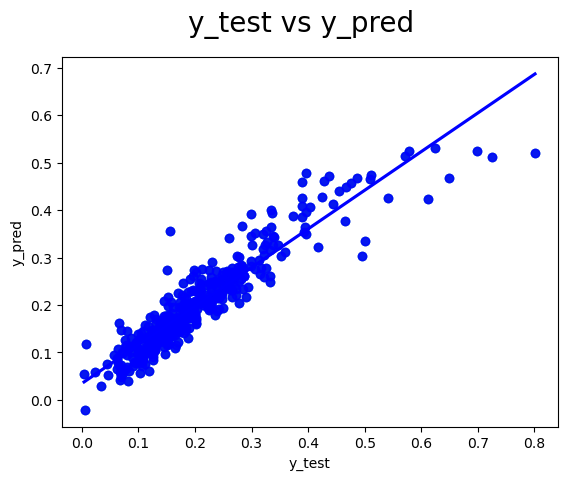

In [153]:
#model evaluation
fig = plt.figure()
plt.scatter(y_test,y_pred)
sns.regplot(x=y_test,y=y_pred,ci=None,color = 'blue')

fig.suptitle('y_test vs y_pred', fontsize = 20)

plt.xlabel('y_test',fontsize = 10)
plt.ylabel('y_pred',fontsize = 10)

plt.show()

In [154]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8592142005003942

In [155]:
print("Training Data")
rss = np.sum(np.square(y_train - y_train_pred))
print(rss)
mse = mean_squared_error(y_train,y_train_pred)
print(mse)
rmse = mse**0.5
print(rmse)

Training Data
1.6912554842430993
0.0016564696221773745
0.040699749657428785


In [156]:
print("Testing Data")
rss = np.sum(np.square(y_test - y_pred))
print(rss)
mse = mean_squared_error(y_test,y_pred)
print(mse)
rmse = mse**0.5
print(rmse)

Testing Data
0.765286435658425
0.0017472293051562216
0.0417998720710509


### Insight
Linear Regression(RFE):with 40 features:

    Training Data:
        r2 score:0.8625557437680991
        RMSE :0.040699749657428785,
        
    Testing Data:
        r2 score:0.8592142005003942
        RMSE :0.0417998720710509

## Step 4: Ridge Regression model

In [157]:
col_x = X_train_rfe.columns

X_train_rfe.pop('const')
X_test.pop('const')

X = X_train_rfe
col_x


Index(['const', 'LotFrontage', 'LotArea', '1stFlrSF', '2ndFlrSF',
       'BsmtFullBath', 'GarageCars', 'GarageArea', 'age', 'MSSubClass_90',
       'MSSubClass_160', 'LotShape_IR3', 'Neighborhood_Crawfor',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'Exterior1st_BrkFace', 'Exterior1st_ImStucc',
       'Exterior2nd_ImStucc', 'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_NO',
       'BsmtQual_TA', 'BsmtExposure_Gd', 'BsmtFinType1_NO', 'HeatingQC_Po',
       'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA', 'OverallQual_8',
       'OverallQual_9', 'OverallQual_10', 'OverallCond_2', 'OverallCond_3',
       'OverallCond_4', 'OverallCond_5', 'OverallCond_6', 'OverallCond_7',
       'OverallCond_8', 'OverallCond_9'],
      dtype='object')

In [158]:
X_test.columns

Index(['LotFrontage', 'LotArea', '1stFlrSF', '2ndFlrSF', 'BsmtFullBath',
       'GarageCars', 'GarageArea', 'age', 'MSSubClass_90', 'MSSubClass_160',
       'LotShape_IR3', 'Neighborhood_Crawfor', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Exterior1st_BrkFace', 'Exterior1st_ImStucc', 'Exterior2nd_ImStucc',
       'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_NO', 'BsmtQual_TA',
       'BsmtExposure_Gd', 'BsmtFinType1_NO', 'HeatingQC_Po', 'KitchenQual_Fa',
       'KitchenQual_Gd', 'KitchenQual_TA', 'OverallQual_8', 'OverallQual_9',
       'OverallQual_10', 'OverallCond_2', 'OverallCond_3', 'OverallCond_4',
       'OverallCond_5', 'OverallCond_6', 'OverallCond_7', 'OverallCond_8',
       'OverallCond_9'],
      dtype='object')

In [159]:
feature_names = ['Const','LotFrontage', 'LotArea', '1stFlrSF', '2ndFlrSF',
       'BsmtFullBath', 'GarageCars', 'GarageArea', 'age', 'MSSubClass_90',
       'MSSubClass_160', 'LotShape_IR3', 'Neighborhood_Crawfor',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'Exterior1st_BrkFace', 'Exterior1st_ImStucc',
       'Exterior2nd_ImStucc', 'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_NO',
       'BsmtQual_TA', 'BsmtExposure_Gd', 'BsmtFinType1_NO', 'HeatingQC_Po',
       'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA', 'OverallQual_8',
       'OverallQual_9', 'OverallQual_10', 'OverallCond_2', 'OverallCond_3',
       'OverallCond_4', 'OverallCond_5', 'OverallCond_6', 'OverallCond_7',
       'OverallCond_8', 'OverallCond_9']

In [160]:
#Applying Ridge Regression with varying the hyperparameter 'lamda or alpha'

X_seq = np.linspace(X.min(),X.max(),300).reshape(-1,1)
lambdas = [0,0.001,0.1,1,10,100,1000]

for i in lambdas:
    degree = 1 #creating degree 1
    
    ridgecoef = PolynomialFeatures(degree)
    
    X_poly = ridgecoef.fit_transform(X)
    ridgereg = Ridge(alpha = i) 
    
    ridgereg.fit(X_poly, y_train)
    
    y_train_pred = ridgereg.predict(ridgecoef.fit_transform(X))
    print("Lamda:"+str(i))
    print("Training Data:")
    print("r2score: "+str(r2_score(y_train,y_train_pred)))
    print((mean_squared_error(y_train,y_train_pred))**0.5)
    print(ridgereg.coef_)
    
    
    #coefs = pd.DataFrame(ridgereg.coef_, columns=['coefficient importance'],index= feature_names)
    #coefs.plot.barh(figsize=(9,7))
    #plt.title("Ridge Model with regularization,Normalized variables")
    #plt.xlabel("Raw Coefficient Values")
    #plt.axvline(x=0, color=".5")
    #plt.subplots_adjust(left = 0.3)
              
    print("Testing Data:")
    y_test_pred = ridgereg.predict(ridgecoef.transform(X_test))
    print("r2score: "+str(r2_score(y_test,y_test_pred)))
    print((mean_squared_error(y_test,y_test_pred))**0.5)
   
    

Lamda:0
Training Data:
r2score: 0.8619396055155792
0.040790872533582725
[ 6.44852470e+12 -3.69143735e-02  1.76369091e-01  3.39225045e-01
  1.46279261e-01  2.91588009e-02  8.80364262e-02 -4.59003217e-02
 -1.20446248e-01 -3.33878022e-02 -4.91875635e-02 -4.27809520e-02
  5.06139052e-02  8.24878251e-02  4.53352515e-02  4.01618481e-02
  3.50785058e-02  3.44124504e-02 -5.92657651e-02  3.59000827e-02
 -3.51860536e-02 -3.62059272e-02 -9.32745221e+12 -3.82330676e-02
  3.20242060e-02  9.32745221e+12 -1.69832407e-02 -4.14153595e-02
 -2.72682939e-02 -3.84479236e-02  3.60291254e-02  7.92398328e-02
  9.54965477e-02  5.43711533e-02  3.05745975e-02  4.32014741e-02
  5.13965021e-02  6.89578287e-02  7.49873500e-02  8.20393002e-02
  1.15162119e-01]
Testing Data:
r2score: 0.8596462137565386
0.04173568955617854
Lamda:0.001
Training Data:
r2score: 0.8625557120840566
0.040699754348539785
[ 0.         -0.03966848  0.17233748  0.34020237  0.14791761  0.03306778
  0.08958112 -0.04565655 -0.11999162 -0.03497005 

### Insight :

 Ridge Regression Model : choose lambda - 0.001
 
    Lamda:0.001
        Training Data:
            r2score: 0.8625557120840566
            RMSE:0.040699754348539785

        Testing Data:
            r2score: 0.8592177853257507
            RMSE:0.04179933989310499

## Step 5: Lasso Regression model

Lamda:0
Training Data:
r2score: 0.8625543171707977
0.040699960877613454
[ 0.         -0.03972659  0.17246816  0.34028563  0.14793653  0.03304235
  0.08963967 -0.04567394 -0.11999319 -0.03496354 -0.04855494 -0.0466528
  0.04878871  0.08059832  0.04278157  0.03856355  0.03490053  0.03508716
 -0.074852    0.03858957 -0.03972599 -0.03858249 -0.04869784 -0.04128054
  0.03087451 -0.01570742 -0.03408715 -0.03666121 -0.02705376 -0.03793425
  0.03513468  0.07948404  0.09309599  0.05362754  0.02850073  0.04364186
  0.05081577  0.06859487  0.07429948  0.08103838  0.11541116]
Testing Data:
r2score: 0.8592347052680516
0.041796827986071323
Lamda:0.001
Training Data:
r2score: 0.8051467736454287
0.048459869554225314
[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  2.53522277e-01
  1.13365650e-01  1.72547389e-02  8.36301313e-02  0.00000000e+00
 -7.88405959e-02 -1.80007325e-02 -1.65886906e-02 -0.00000000e+00
  2.38126133e-02  5.37312973e-02  3.37254495e-02  3.65546582e-05
  0.00000000e+00  1.06937130e-

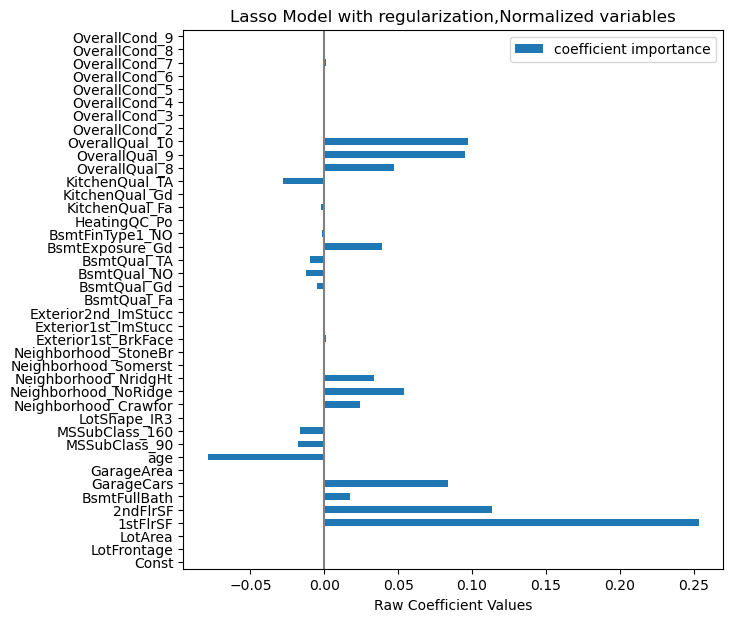

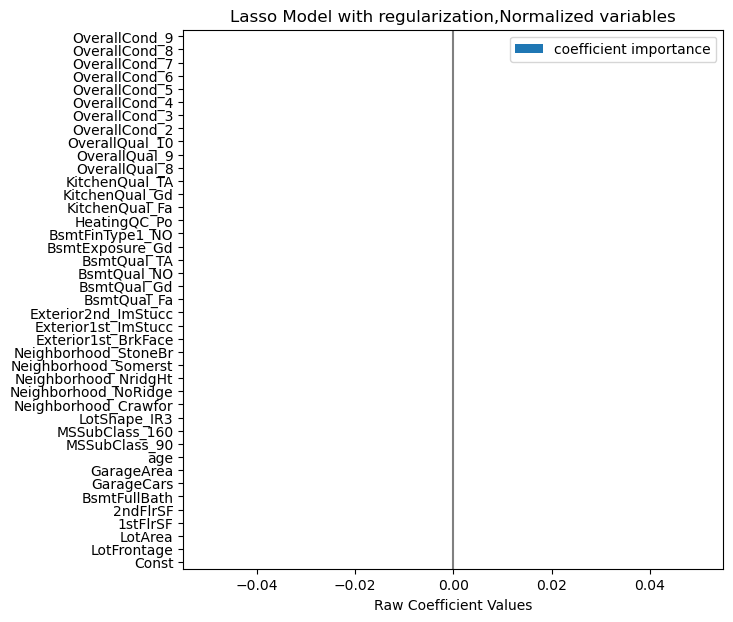

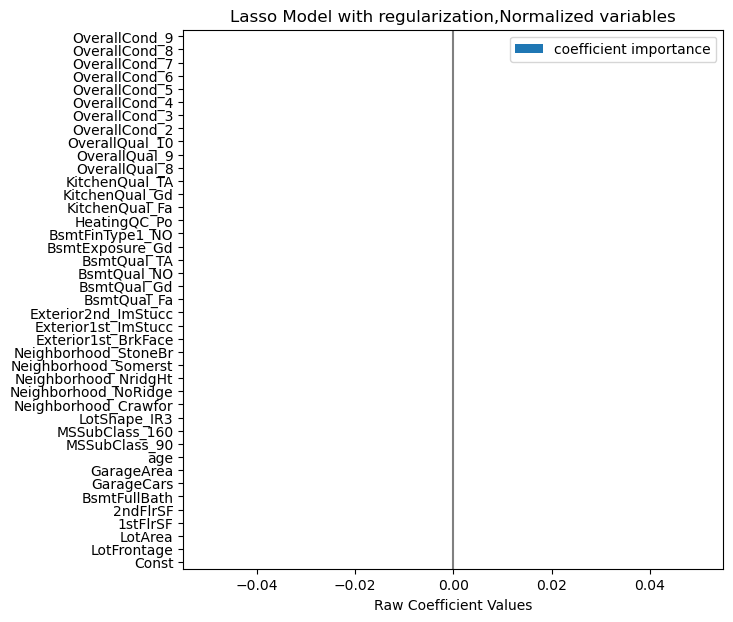

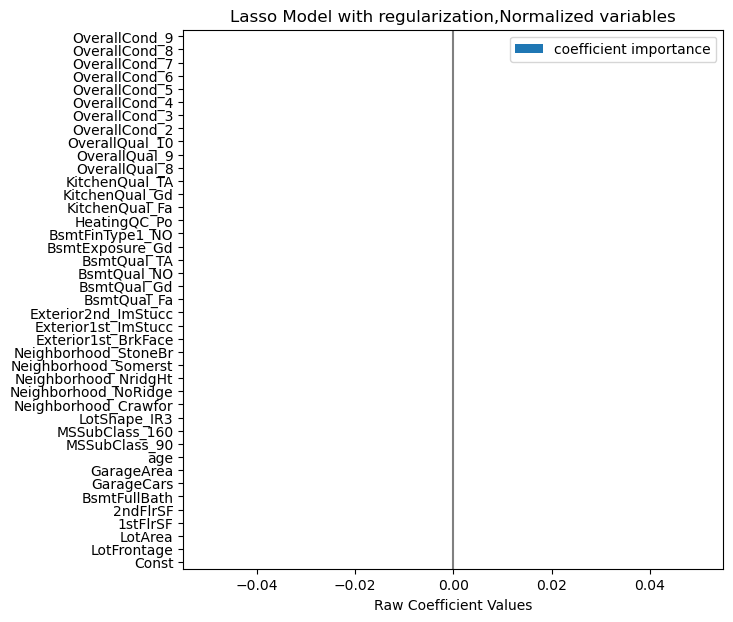

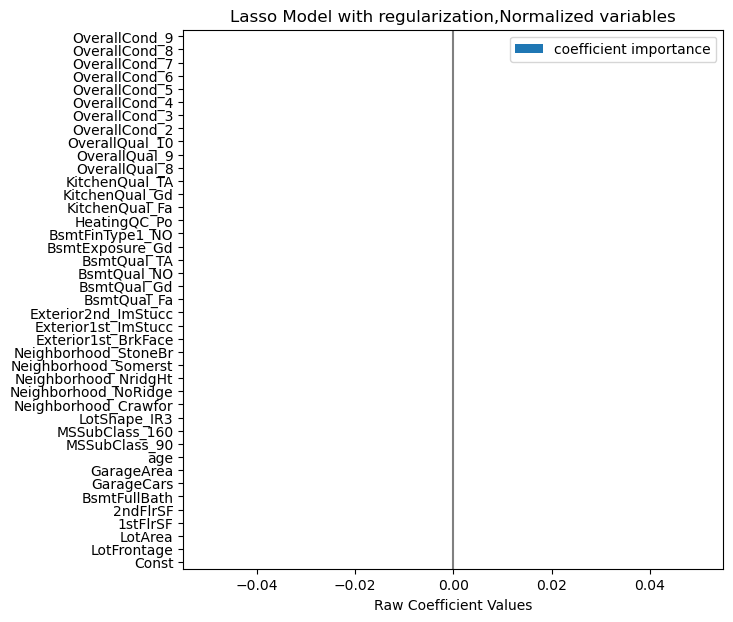

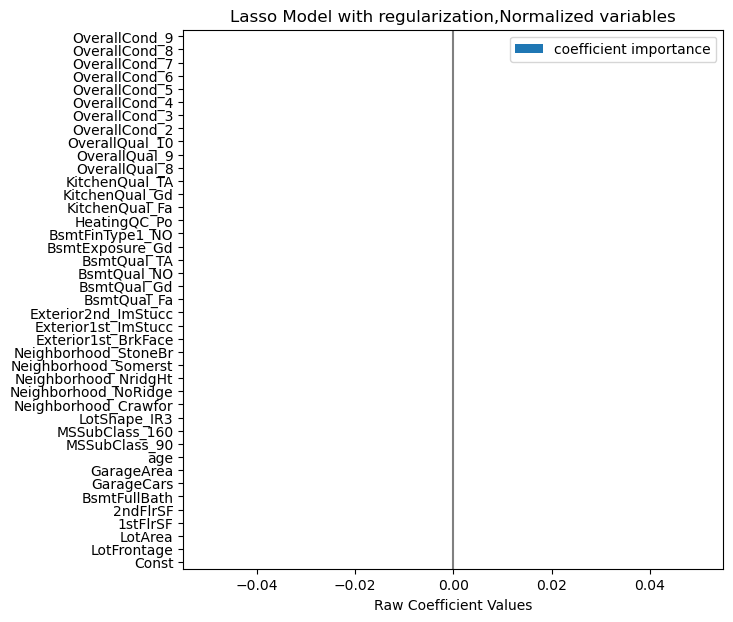

In [161]:
#Applying Ridge Regression with varying the hyperparameter 'lamda or alpha'

#X_seq = np.linspace(X.min(),X.max(),300).reshape(-1,1)
lambdas = [0,0.001,0.1,1,10,100,1000]

for i in lambdas:
    degree = 1 #creating degree 1
    
    lassocoef = PolynomialFeatures(degree)
    
    X_poly = lassocoef.fit_transform(X)
    lassoreg = Lasso(alpha = i) 
    
    lassoreg.fit(X_poly, y_train)
    
    y_train_pred = lassoreg.predict(lassocoef.fit_transform(X))
    print("Lamda:"+str(i))
    print("Training Data:")
    print("r2score: "+str(r2_score(y_train,y_train_pred)))
    print((mean_squared_error(y_train,y_train_pred))**0.5)
    print(lassoreg.coef_)
    
    #feature_names = lassoreg[:-1].get_feature_names_out()
    coefs = pd.DataFrame(lassoreg.coef_, columns=['coefficient importance'],index= feature_names)
    
    coefs.plot.barh(figsize=(9,7))
    plt.title("Lasso Model with regularization,Normalized variables")
    plt.xlabel("Raw Coefficient Values")
    plt.axvline(x=0, color=".5")
    plt.subplots_adjust(left = 0.3)
    
              
    print("Testing Data:")
    y_test_pred = lassoreg.predict(lassocoef.transform(X_test))
    print("r2score: "+str(r2_score(y_test,y_test_pred)))
    print((mean_squared_error(y_test,y_test_pred))**0.5)

### Insight:

    Lasso Regression Model: choose lambda = 0.001 - some more coeff values are zero

    Lamda:0.001

    Training Data:
        r2score: 0.8051467736454287
        RMSE :0.048459869554225314

    Testing Data:
        r2score: 0.7958201652667687
        RMSE :0.05033869480512303

    
    



In [162]:
degree = 1 #creating degree 1

#lambda
i = 0.001

RIDGE
Lamda:0.001
Training Data:
r2score: 0.8625557120840566
0.040699754348539785
[ 0.         -0.03966848  0.17233748  0.34020237  0.14791761  0.03306778
  0.08958112 -0.04565655 -0.11999162 -0.03497005 -0.04855095 -0.0466545
  0.04878863  0.080608    0.04278389  0.03856631  0.03490497  0.03509671
 -0.07473961  0.03855483 -0.03955892 -0.03857712 -0.03220022 -0.04127469
  0.03092726 -0.03220022 -0.03403994 -0.03654699 -0.02706356 -0.03795458
  0.03513227  0.07947635  0.0930768   0.05739029  0.03228381  0.04745174
  0.05462771  0.07239927  0.07809129  0.08481384  0.1192196 ]
Testing Data:
r2score: 0.8592177853257507
0.04179933989310499


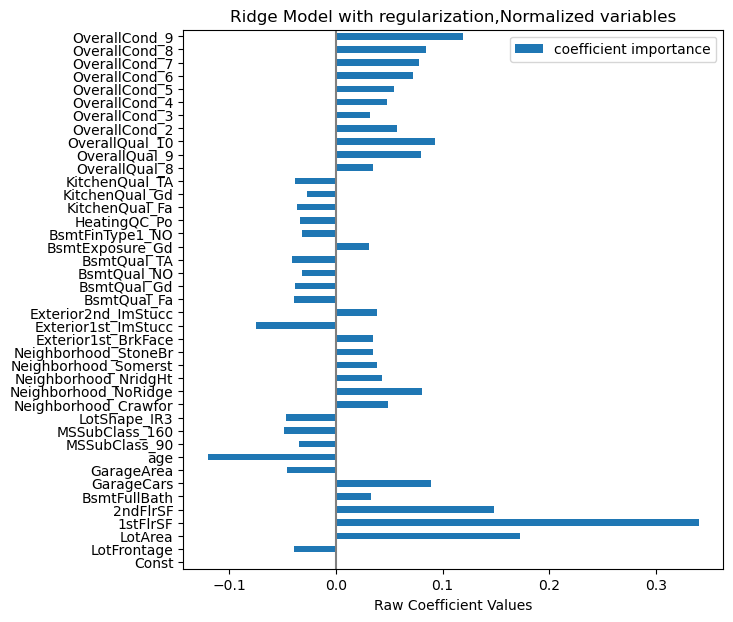

In [163]:
#Ridge  

print("RIDGE")
ridgecoef = PolynomialFeatures(degree)
    
X_poly = ridgecoef.fit_transform(X)
ridgereg = Ridge(alpha = i) 
    
ridgereg.fit(X_poly, y_train)
    
y_train_pred = ridgereg.predict(ridgecoef.fit_transform(X))
    
print("Lamda:"+str(i))
print("Training Data:")
print("r2score: "+str(r2_score(y_train,y_train_pred)))
print((mean_squared_error(y_train,y_train_pred))**0.5)
print(ridgereg.coef_)

print("Testing Data:")
y_test_pred = ridgereg.predict(ridgecoef.transform(X_test))
print("r2score: "+str(r2_score(y_test,y_test_pred)))
print((mean_squared_error(y_test,y_test_pred))**0.5)
      
#feature_names = lassoreg[:-1].get_feature_names_out()
coefs = pd.DataFrame(ridgereg.coef_, columns=['coefficient importance'],index= feature_names)

coefs.plot.barh(figsize=(9,7))
plt.title("Ridge Model with regularization,Normalized variables")
plt.xlabel("Raw Coefficient Values")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left = 0.3)



### Insights: RIDGE

Top 5 predictor variables:

    1stFlrSF      :0.34028563
    LotArea       :0.17233748
    2ndFlrSF      :0.14791761
    age           :-0.11999162
    OverallCond_9 :0.1192196

In [164]:
rigde_top_col=['1stFlrSF','LotArea','2ndFlrSF','age','OverallCond_9']

LASSO
Lamda:0.001
Training Data:
r2score: 0.8051467736454287
0.048459869554225314
[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  2.53522277e-01
  1.13365650e-01  1.72547389e-02  8.36301313e-02  0.00000000e+00
 -7.88405959e-02 -1.80007325e-02 -1.65886906e-02 -0.00000000e+00
  2.38126133e-02  5.37312973e-02  3.37254495e-02  3.65546582e-05
  0.00000000e+00  1.06937130e-03 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -5.29823070e-03 -1.24152233e-02 -1.00320301e-02
  3.92180539e-02 -1.38784884e-03 -0.00000000e+00 -2.36613911e-03
 -8.23402377e-04 -2.83275466e-02  4.71829180e-02  9.49843730e-02
  9.73908048e-02  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -7.93499508e-04  0.00000000e+00  8.05281640e-04  0.00000000e+00
  0.00000000e+00]
Testing Data:
r2score: 0.7958201652667687
0.05033869480512303


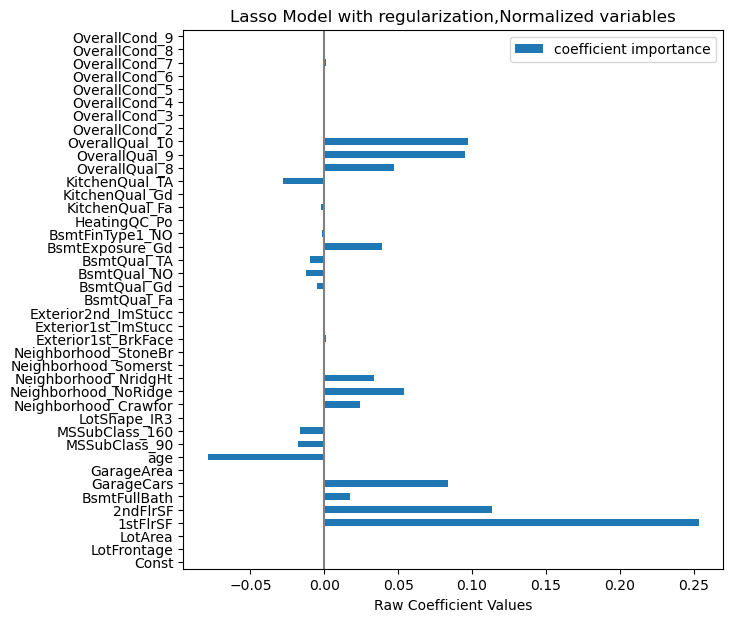

In [165]:
#Lasso

print("LASSO")
lassocoef = PolynomialFeatures(degree)
    
X_poly = lassocoef.fit_transform(X)
lassoreg = Lasso(alpha = i) 
    
lassoreg.fit(X_poly, y_train)
y_train_pred = lassoreg.predict(lassocoef.fit_transform(X))
    
print("Lamda:"+str(i))
print("Training Data:")
print("r2score: "+str(r2_score(y_train,y_train_pred)))
print((mean_squared_error(y_train,y_train_pred))**0.5)
print(lassoreg.coef_)

print("Testing Data:")
y_test_pred = lassoreg.predict(lassocoef.transform(X_test))
print("r2score: "+str(r2_score(y_test,y_test_pred)))
print((mean_squared_error(y_test,y_test_pred))**0.5)

#feature_names = lassoreg[:-1].get_feature_names_out()
coefs = pd.DataFrame(lassoreg.coef_, columns=['coefficient importance'],index= feature_names)

coefs.plot.barh(figsize=(9,7))
plt.title("Lasso Model with regularization,Normalized variables")
plt.xlabel("Raw Coefficient Values")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left = 0.3)

### Insights: LASSO

Top 5 predictor variables:

    1stFlrSF      :0.253522
    2ndFlrSF      :0.113366
    OverallQual_10:0.097391
    OverallQual_9 :0.094984
    age           :-0.078841


In [166]:
lasso_top_col=['1stFlrSF','2ndFlrSF','age','OverallQual_10','OverallQual_9']

In [167]:
betas = pd.DataFrame(index=feature_names , columns=['Ridge','Lasso'])


betas['Ridge']  = ridgereg.coef_
betas['Lasso']  = lassoreg.coef_

betas

Ridge     Lasso
Const                 0.000000  0.000000
LotFrontage          -0.039668  0.000000
LotArea               0.172337  0.000000
1stFlrSF              0.340202  0.253522
2ndFlrSF              0.147918  0.113366
BsmtFullBath          0.033068  0.017255
GarageCars            0.089581  0.083630
GarageArea           -0.045657  0.000000
age                  -0.119992 -0.078841
MSSubClass_90        -0.034970 -0.018001
MSSubClass_160       -0.048551 -0.016589
LotShape_IR3         -0.046654 -0.000000
Neighborhood_Crawfor  0.048789  0.023813
Neighborhood_NoRidge  0.080608  0.053731
Neighborhood_NridgHt  0.042784  0.033725
Neighborhood_Somerst  0.038566  0.000037
Neighborhood_StoneBr  0.034905  0.000000
Exterior1st_BrkFace   0.035097  0.001069
Exterior1st_ImStucc  -0.074740 -0.000000
Exterior2nd_ImStucc   0.038555  0.000000
BsmtQual_Fa          -0.039559 -0.000000
BsmtQual_Gd          -0.038577 -0.005298
BsmtQual_NO          -0.032200 -0.012415
BsmtQual_TA          -0.041275 -0.010032
BsmtExposure_Gd       0.030927  0.039218
BsmtFinType1_NO      -0.032200 -0.001388
HeatingQC_Po         -0.034040 -0.000000
KitchenQual_Fa       -0.036547 -0.002366
KitchenQual_Gd       -0.027064 -0.000823
KitchenQual_TA       -0.037955 -0.028328
OverallQual_8         0.035132  0.047183
OverallQual_9         0.079476  0.094984
OverallQual_10        0.093077  0.097391
OverallCond_2         0.057390  0.000000
OverallCond_3         0.032284 -0.000000
OverallCond_4         0.047452 -0.000000
OverallCond_5         0.054628 -0.000793
OverallCond_6         0.072399  0.000000
OverallCond_7         0.078091  0.000805
OverallCond_8         0.084814  0.000000
OverallCond_9         0.119220  0.000000

In [168]:
degree = 1 #creating degree 1

#lambda(double of 0.001)
i = 0.002

RIDGE
Lamda:0.002
Training Data:
r2score: 0.8625556188986986
0.04069976814547741
[ 0.         -0.03962698  0.17225414  0.34011656  0.14790465  0.03306448
  0.08955932 -0.04559761 -0.11997523 -0.03496315 -0.0485484  -0.04663587
  0.04879004  0.0806069   0.04278049  0.03855931  0.03490373  0.03510248
 -0.07464904  0.03853792 -0.03959073 -0.0385783  -0.0322026  -0.04127926
  0.03092496 -0.0322026  -0.03400937 -0.03657283 -0.02706538 -0.0379591
  0.03513324  0.07947953  0.09308406  0.05678541  0.03169856  0.04686344
  0.0540413   0.07181111  0.07750371  0.08422346  0.11861651]
Testing Data:
r2score: 0.8592212655878217
0.04179882323140653


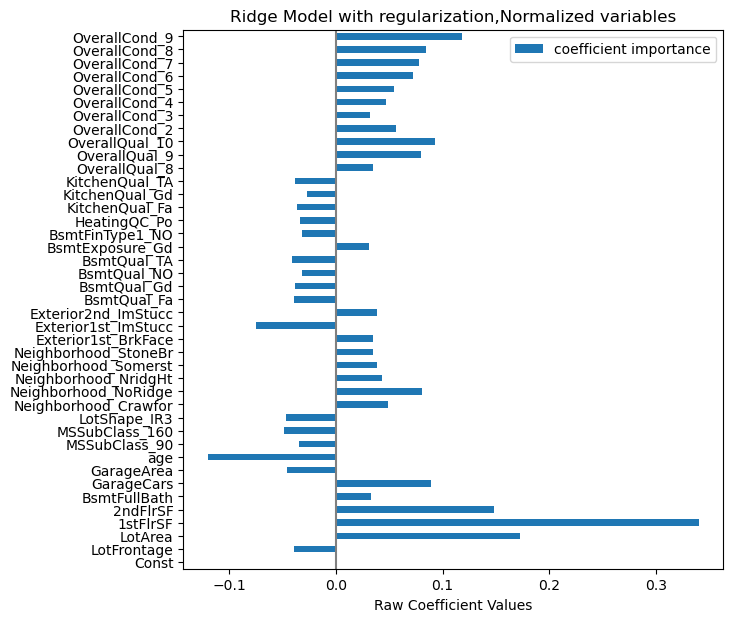

In [169]:
#Ridge  

print("RIDGE")
ridgecoef = PolynomialFeatures(degree)
    
X_poly = ridgecoef.fit_transform(X)
ridgereg = Ridge(alpha = i) 
    
ridgereg.fit(X_poly, y_train)
    
y_train_pred = ridgereg.predict(ridgecoef.fit_transform(X))
    
print("Lamda:"+str(i))
print("Training Data:")
print("r2score: "+str(r2_score(y_train,y_train_pred)))
print((mean_squared_error(y_train,y_train_pred))**0.5)
print(ridgereg.coef_)

print("Testing Data:")
y_test_pred = ridgereg.predict(ridgecoef.transform(X_test))
print("r2score: "+str(r2_score(y_test,y_test_pred)))
print((mean_squared_error(y_test,y_test_pred))**0.5)
      
#feature_names = lassoreg[:-1].get_feature_names_out()
coefs = pd.DataFrame(ridgereg.coef_, columns=['coefficient importance'],index= feature_names)

coefs.plot.barh(figsize=(9,7))
plt.title("Ridge Model with regularization,Normalized variables")
plt.xlabel("Raw Coefficient Values")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left = 0.3)



LASSO
Lamda:0.002
Training Data:
r2score: 0.7293552227618919
0.05711211790440109
[ 0.          0.          0.          0.14941177  0.07693467  0.
  0.09792412  0.         -0.0485874  -0.         -0.         -0.
  0.          0.0447109   0.03322644  0.          0.          0.
 -0.          0.         -0.         -0.         -0.         -0.01117937
  0.04349696 -0.         -0.         -0.         -0.         -0.03837864
  0.04685108  0.06982025  0.06010389  0.         -0.         -0.
  0.          0.          0.          0.          0.        ]
Testing Data:
r2score: 0.7138636351836265
0.0595911895166149


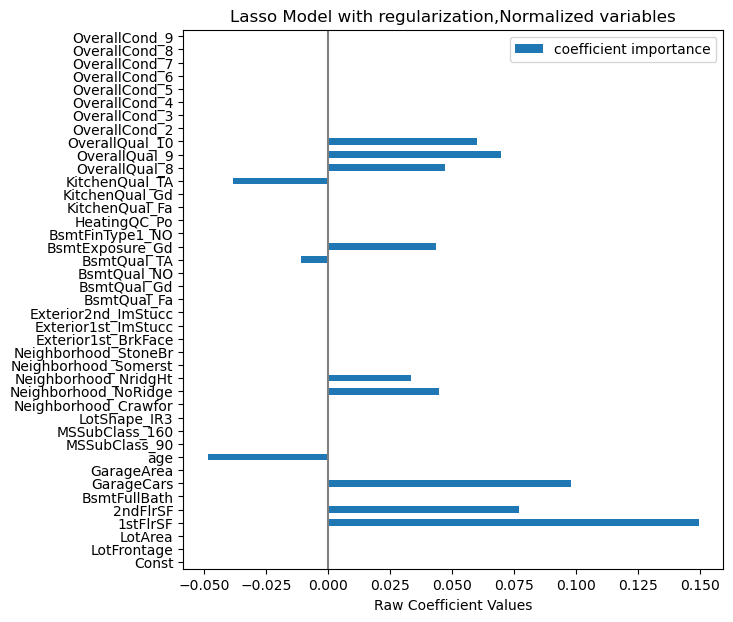

In [170]:
#Lasso


print("LASSO")
lassocoef = PolynomialFeatures(degree)
    
X_poly = lassocoef.fit_transform(X)
lassoreg = Lasso(alpha = i) 
    
lassoreg.fit(X_poly, y_train)
y_train_pred = lassoreg.predict(lassocoef.fit_transform(X))
    
print("Lamda:"+str(i))
print("Training Data:")
print("r2score: "+str(r2_score(y_train,y_train_pred)))
print((mean_squared_error(y_train,y_train_pred))**0.5)
print(lassoreg.coef_)

print("Testing Data:")
y_test_pred = lassoreg.predict(lassocoef.transform(X_test))
print("r2score: "+str(r2_score(y_test,y_test_pred)))
print((mean_squared_error(y_test,y_test_pred))**0.5)

#feature_names = lassoreg[:-1].get_feature_names_out()
coefs = pd.DataFrame(lassoreg.coef_, columns=['coefficient importance'],index= feature_names)

coefs.plot.barh(figsize=(9,7))
plt.title("Lasso Model with regularization,Normalized variables")
plt.xlabel("Raw Coefficient Values")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left = 0.3)



In [171]:
betas = pd.DataFrame(index=feature_names , columns=['Ridge','Lasso'])


betas['Ridge']  = ridgereg.coef_
betas['Lasso']  = lassoreg.coef_

betas

Ridge     Lasso
Const                 0.000000  0.000000
LotFrontage          -0.039627  0.000000
LotArea               0.172254  0.000000
1stFlrSF              0.340117  0.149412
2ndFlrSF              0.147905  0.076935
BsmtFullBath          0.033064  0.000000
GarageCars            0.089559  0.097924
GarageArea           -0.045598  0.000000
age                  -0.119975 -0.048587
MSSubClass_90        -0.034963 -0.000000
MSSubClass_160       -0.048548 -0.000000
LotShape_IR3         -0.046636 -0.000000
Neighborhood_Crawfor  0.048790  0.000000
Neighborhood_NoRidge  0.080607  0.044711
Neighborhood_NridgHt  0.042780  0.033226
Neighborhood_Somerst  0.038559  0.000000
Neighborhood_StoneBr  0.034904  0.000000
Exterior1st_BrkFace   0.035102  0.000000
Exterior1st_ImStucc  -0.074649 -0.000000
Exterior2nd_ImStucc   0.038538  0.000000
BsmtQual_Fa          -0.039591 -0.000000
BsmtQual_Gd          -0.038578 -0.000000
BsmtQual_NO          -0.032203 -0.000000
BsmtQual_TA          -0.041279 -0.011179
BsmtExposure_Gd       0.030925  0.043497
BsmtFinType1_NO      -0.032203 -0.000000
HeatingQC_Po         -0.034009 -0.000000
KitchenQual_Fa       -0.036573 -0.000000
KitchenQual_Gd       -0.027065 -0.000000
KitchenQual_TA       -0.037959 -0.038379
OverallQual_8         0.035133  0.046851
OverallQual_9         0.079480  0.069820
OverallQual_10        0.093084  0.060104
OverallCond_2         0.056785  0.000000
OverallCond_3         0.031699 -0.000000
OverallCond_4         0.046863 -0.000000
OverallCond_5         0.054041  0.000000
OverallCond_6         0.071811  0.000000
OverallCond_7         0.077504  0.000000
OverallCond_8         0.084223  0.000000
OverallCond_9         0.118617  0.000000

## Build Ridge and Lasso models by removing there Top 5 features respectivly

In [172]:
X = X_train_rfe

In [173]:
degree = 1 #creating degree 1
#lambda
i = 0.001

In [174]:
X_ridge = X.drop(columns = rigde_top_col)
X_ridge_test = X_test.drop(columns = rigde_top_col)

In [175]:
X_ridge.shape

(1021, 35)

In [176]:
X_ridge.columns

Index(['LotFrontage', 'BsmtFullBath', 'GarageCars', 'GarageArea',
       'MSSubClass_90', 'MSSubClass_160', 'LotShape_IR3',
       'Neighborhood_Crawfor', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Exterior1st_BrkFace',
       'Exterior1st_ImStucc', 'Exterior2nd_ImStucc', 'BsmtQual_Fa',
       'BsmtQual_Gd', 'BsmtQual_NO', 'BsmtQual_TA', 'BsmtExposure_Gd',
       'BsmtFinType1_NO', 'HeatingQC_Po', 'KitchenQual_Fa', 'KitchenQual_Gd',
       'KitchenQual_TA', 'OverallQual_8', 'OverallQual_9', 'OverallQual_10',
       'OverallCond_2', 'OverallCond_3', 'OverallCond_4', 'OverallCond_5',
       'OverallCond_6', 'OverallCond_7', 'OverallCond_8'],
      dtype='object')

In [177]:
feature_names_ridge = ['const','LotFrontage', 'BsmtFullBath', 'GarageCars', 'GarageArea',
       'MSSubClass_90', 'MSSubClass_160', 'LotShape_IR3',
       'Neighborhood_Crawfor', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Exterior1st_BrkFace',
       'Exterior1st_ImStucc', 'Exterior2nd_ImStucc', 'BsmtQual_Fa',
       'BsmtQual_Gd', 'BsmtQual_NO', 'BsmtQual_TA', 'BsmtExposure_Gd',
       'BsmtFinType1_NO', 'HeatingQC_Po', 'KitchenQual_Fa', 'KitchenQual_Gd',
       'KitchenQual_TA', 'OverallQual_8', 'OverallQual_9', 'OverallQual_10',
       'OverallCond_2', 'OverallCond_3', 'OverallCond_4', 'OverallCond_5',
       'OverallCond_6', 'OverallCond_7', 'OverallCond_8']

RIDGE
Lamda:0.001
Training Data:
r2score: 0.7834556415116392
0.051085997413457165
[ 0.          0.10931535  0.0233091   0.10752951  0.02686144 -0.01137716
 -0.02587471 -0.01330696  0.05519398  0.11899084  0.0307999   0.0257183
  0.02778048  0.04577266 -0.13923112  0.03508675 -0.09586822 -0.04420711
 -0.05051227 -0.07487915  0.03175578 -0.05051227 -0.07534518 -0.07698398
 -0.03718107 -0.06573777  0.04921761  0.1029065   0.16120272 -0.07531687
 -0.0788448  -0.0637915  -0.04554613 -0.03322095 -0.03449167 -0.03751543]
Testing Data:
r2score: 0.7619842188882349
0.05434985670015881


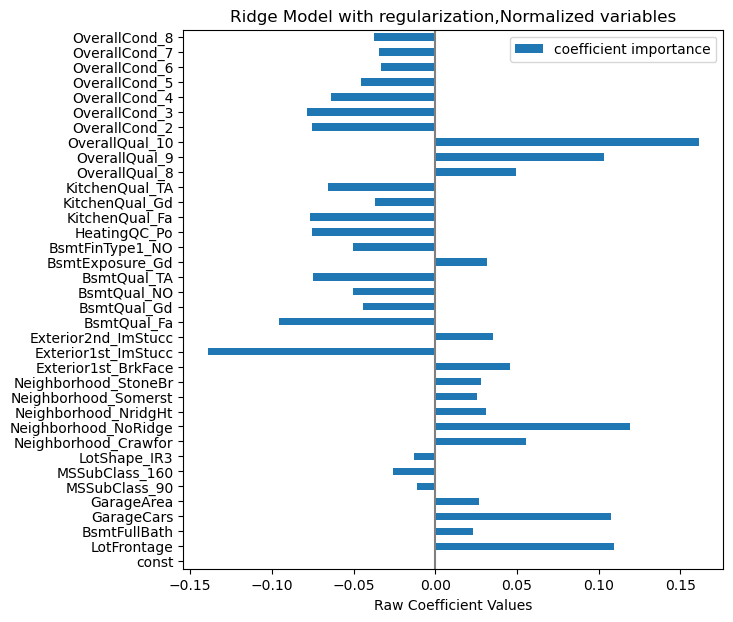

In [178]:
#Ridge  

print("RIDGE")
ridgecoef = PolynomialFeatures(degree)
    
X_poly = ridgecoef.fit_transform(X_ridge)
ridgereg = Ridge(alpha = i) 
    
ridgereg.fit(X_poly, y_train)
    
y_train_pred = ridgereg.predict(ridgecoef.fit_transform(X_ridge))
    
print("Lamda:"+str(i))
print("Training Data:")
print("r2score: "+str(r2_score(y_train,y_train_pred)))
print((mean_squared_error(y_train,y_train_pred))**0.5)
print(ridgereg.coef_)

print("Testing Data:")
y_test_pred = ridgereg.predict(ridgecoef.transform(X_ridge_test))
print("r2score: "+str(r2_score(y_test,y_test_pred)))
print((mean_squared_error(y_test,y_test_pred))**0.5)
      
#feature_names = lassoreg[:-1].get_feature_names_out()
coefs = pd.DataFrame(ridgereg.coef_, columns=['coefficient importance'],index= feature_names_ridge)

coefs.plot.barh(figsize=(9,7))
plt.title("Ridge Model with regularization,Normalized variables")
plt.xlabel("Raw Coefficient Values")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left = 0.3)


In [179]:
X_lasso = X.drop(columns = lasso_top_col)
X_lasso_test = X_test.drop(columns = lasso_top_col)

In [180]:
X_lasso.columns

Index(['LotFrontage', 'LotArea', 'BsmtFullBath', 'GarageCars', 'GarageArea',
       'MSSubClass_90', 'MSSubClass_160', 'LotShape_IR3',
       'Neighborhood_Crawfor', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Exterior1st_BrkFace',
       'Exterior1st_ImStucc', 'Exterior2nd_ImStucc', 'BsmtQual_Fa',
       'BsmtQual_Gd', 'BsmtQual_NO', 'BsmtQual_TA', 'BsmtExposure_Gd',
       'BsmtFinType1_NO', 'HeatingQC_Po', 'KitchenQual_Fa', 'KitchenQual_Gd',
       'KitchenQual_TA', 'OverallQual_8', 'OverallCond_2', 'OverallCond_3',
       'OverallCond_4', 'OverallCond_5', 'OverallCond_6', 'OverallCond_7',
       'OverallCond_8', 'OverallCond_9'],
      dtype='object')

In [181]:
feature_names_lasso = ['const','LotFrontage', 'LotArea', 'BsmtFullBath', 'GarageCars', 'GarageArea',
       'MSSubClass_90', 'MSSubClass_160', 'LotShape_IR3',
       'Neighborhood_Crawfor', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Exterior1st_BrkFace',
       'Exterior1st_ImStucc', 'Exterior2nd_ImStucc', 'BsmtQual_Fa',
       'BsmtQual_Gd', 'BsmtQual_NO', 'BsmtQual_TA', 'BsmtExposure_Gd',
       'BsmtFinType1_NO', 'HeatingQC_Po', 'KitchenQual_Fa', 'KitchenQual_Gd',
       'KitchenQual_TA', 'OverallQual_8', 'OverallCond_2', 'OverallCond_3',
       'OverallCond_4', 'OverallCond_5', 'OverallCond_6', 'OverallCond_7',
       'OverallCond_8', 'OverallCond_9']

In [182]:
X_lasso.shape

(1021, 35)

LASSO
Lamda:0.001
Training Data:
r2score: 0.7047142382911329
0.05965539055961897
[ 0.          0.          0.          0.0024356   0.11020291  0.05692849
 -0.         -0.01258588  0.          0.02792744  0.10989839  0.04419875
  0.          0.          0.00299286 -0.          0.         -0.03937701
 -0.03040612 -0.04516775 -0.05340777  0.05191409 -0.01408318 -0.
 -0.07265162 -0.0528089  -0.09570708  0.03388125 -0.         -0.
 -0.          0.          0.          0.         -0.          0.        ]
Testing Data:
r2score: 0.668442642034726
0.06414678017773935


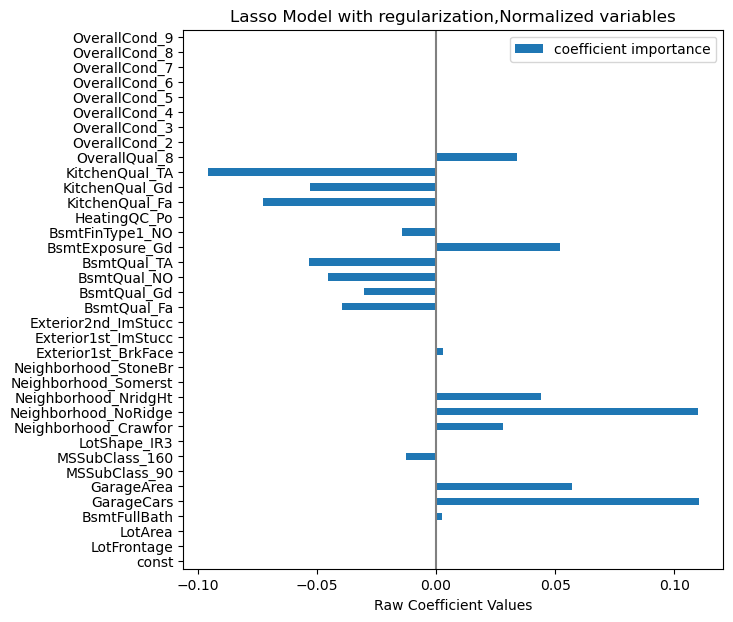

In [183]:
#Lasso

print("LASSO")
lassocoef = PolynomialFeatures(degree)
    
X_poly = lassocoef.fit_transform(X_lasso)
lassoreg = Lasso(alpha = i) 
    
lassoreg.fit(X_poly, y_train)
y_train_pred = lassoreg.predict(lassocoef.fit_transform(X_lasso))
    
print("Lamda:"+str(i))
print("Training Data:")
print("r2score: "+str(r2_score(y_train,y_train_pred)))
print((mean_squared_error(y_train,y_train_pred))**0.5)
print(lassoreg.coef_)

print("Testing Data:")
y_test_pred = lassoreg.predict(lassocoef.transform(X_lasso_test))
print("r2score: "+str(r2_score(y_test,y_test_pred)))
print((mean_squared_error(y_test,y_test_pred))**0.5)

#feature_names = lassoreg[:-1].get_feature_names_out()
coefs = pd.DataFrame(lassoreg.coef_, columns=['coefficient importance'],index= feature_names_lasso )

coefs.plot.barh(figsize=(9,7))
plt.title("Lasso Model with regularization,Normalized variables")
plt.xlabel("Raw Coefficient Values")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left = 0.3)

### Insights:

Top5 features:

    GarageCars            :0.11020291 
    Neighborhood_NoRidge  :0.10989839 
    KitchenQual_TA        :-0.09570708
    KitchenQual_Fa        : -0.072652
    GarageArea            :0.05692849 


In [184]:
betas = pd.DataFrame(index=feature_names_lasso , columns=['Lasso'])

betas['Lasso']  = lassoreg.coef_

betas

Lasso
const                 0.000000
LotFrontage           0.000000
LotArea               0.000000
BsmtFullBath          0.002436
GarageCars            0.110203
GarageArea            0.056928
MSSubClass_90        -0.000000
MSSubClass_160       -0.012586
LotShape_IR3          0.000000
Neighborhood_Crawfor  0.027927
Neighborhood_NoRidge  0.109898
Neighborhood_NridgHt  0.044199
Neighborhood_Somerst  0.000000
Neighborhood_StoneBr  0.000000
Exterior1st_BrkFace   0.002993
Exterior1st_ImStucc  -0.000000
Exterior2nd_ImStucc   0.000000
BsmtQual_Fa          -0.039377
BsmtQual_Gd          -0.030406
BsmtQual_NO          -0.045168
BsmtQual_TA          -0.053408
BsmtExposure_Gd       0.051914
BsmtFinType1_NO      -0.014083
HeatingQC_Po         -0.000000
KitchenQual_Fa       -0.072652
KitchenQual_Gd       -0.052809
KitchenQual_TA       -0.095707
OverallQual_8         0.033881
OverallCond_2        -0.000000
OverallCond_3        -0.000000
OverallCond_4        -0.000000
OverallCond_5         0.000000
OverallCond_6         0.000000
OverallCond_7         0.000000
OverallCond_8        -0.000000
OverallCond_9         0.000000

## Insights:


#### Ridge Regression Model:

    Lambda / alpha :0.001
    Training Data:
        r2score: 0.8625557120840566
        RMSE:0.040699754348539785

    Testing Data:
        r2score: 0.8592177853257507
        RMSE:0.04179933989310499

    Top 5 predictor variables:(independent variables)
      1stFlrSF      :0.34028563
      LotArea       :0.17233748
      2ndFlrSF      :0.14791761
      age           :-0.11999162
      OverallCond_9 :0.1192196

#### Lasso Regression Model:

    Lambda / alpha :0.001
    Training Data:
        r2score: 0.8051467736454287
        RMSE :0.048459869554225314

    Testing Data:
        r2score: 0.7958201652667687
        RMSE :0.05033869480512303

    Top 5 predictor variables:(independent variables)
        1stFlrSF      :0.253522
        2ndFlrSF      :0.113366
        OverallQual_10:0.097391
        OverallQual_9 :0.094984
        age           :-0.078841
     
    Note: Target variable is normalized which can be inverted